# Projet 2: Analysez des données de systèmes éducatifs

<div class="alert alert-block alert-info">
    <p> Analyse exploratoire des données sur l'éducation issues de la Banque Mondiale avec pour objectif de faire des recommandations business pour un projet d'expansion à l'international de la société Academy </p>
</div>

**Table des matières:** <a class="anchor" id="0"></a>

1. [Import des librairies et chargement des datasets](#library)
2. [Analyse exploratoire](#explo)
    1. [Country](#country)
    2. [Country_series](#country_series)
    3. [Series](#series)
    4. [Footnote](#footnote)
    5. [Data](#data)
3. [Construction du dataset filtré](#filtre)
    1. [Travail préparatoire](#prep)
    2. [Définition de la période d'analyse](#periode)
    3. [Selection des indicateurs pertinents](#indic)
        1. [Par région](#by_region)
        2. [Par pays](#by_country)
        3. [Par année](#by_year)
4. [Pays ciblés et projections](#target)
    1. [Principales statistiques](#stats)
    2. [Pays à fort potentiel de clients](#pays_potentiel)
        1. [Population en âge de faire des études secondaires et tertiaires](#pop_sec_ter)
        2. [Prospects internet](#prosp_internet)
        3. [Prospects ordinateur personnel](#prosp_ordi)
        4. [Prospects internet en fonction des prospects ayant un ordinateur personnel](#prosp_ordi_internet)
        5. [GDP](#GDP)
        6. [Dépenses du gouvernement dans l'éducation](#gouv)
        7. [Population 15-24 ans en 2040 par plus haut degré d'éducation en (secondaire et post secondaire)](#15-24)
    3. [Création d'un score pour valider la sélection](#score)
    4. [Evolution dans le temps](#evolution)
        1. [Corrélations des indicateurs](#corr)    
        2. [Focus sur les indicateurs de projections](#evo_prj)
        3. [Population de 0 à 24 ans](#evo_024)
        4. [Evolution numérique](#evo_num) 
        5. [Evolution de la richesse et des dépenses du gouvernement dans l'éducation](#evo_GDP)
5. [Recommandations finales](#reco_fin)

## Import des librairies et chargement des datasets <a class="anchor" id="library"></a>

In [1]:
import numpy as np # pour l'algèbre linéaire
import pandas as pd # pour l'analyse de données

import collections # comptabiliser le nombre de mots

import seaborn as sns # datavisualisation
import matplotlib.pyplot as plt # datavisualisation
from matplotlib.gridspec import GridSpec # visualisation sous forme de grille
%matplotlib inline

from pyecharts.charts import Map,Geo # visualisation sous forme de carte
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [3]:
# Setup
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
sns.set_theme(style="white")

import warnings
warnings.filterwarnings('ignore')

Chargement des données sur l'éducation de la Banque Mondiale : https://datacatalog.worldbank.org/search/dataset/0038480

In [4]:
# Chargement des datasets au format .csv dans des dataframes
country = pd.read_csv('data/EdStatsCountry.csv')
country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
series = pd.read_csv('data/EdStatsSeries.csv')
footnote = pd.read_csv('data/EdStatsFootNote.csv')
data = pd.read_csv('data/EdStatsData.csv')

## Analyse exploratoire <a class="anchor" id="explo"></a>

### Country <a class="anchor" id="country"></a>

Le fichier EdStatsCountry.csv contient des informations générales économiques par pays telles que:

- la devise
- des notes
- la région
- un classement par groupe de revenus
- des années de référence
- l'année la plus récente de mise à jour des données
- ...

**Vérification de l'import**

In [5]:
# Visualisation des 5 premières lignes du dataset
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


**Structure du dataset**

In [6]:
# Structure du dataset
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [7]:
country.shape

(241, 32)

- 241 pays sont représentés
- ce dataset contient 28 colonnes de type "Object" et 4 de type "float" (total = 32 colonnes)
- on remarque la présence de valeurs manquantes dans la plupart des colonnes

**Valeurs uniques par colonne**

In [8]:
# Nombre de valeurs uniques
for column in country.columns:
    print(f"{column}: Modalités de la colonne: {country[column].nunique()}")
    print("--------------------------------------------------------------")

Country Code: Modalités de la colonne: 241
--------------------------------------------------------------
Short Name: Modalités de la colonne: 241
--------------------------------------------------------------
Table Name: Modalités de la colonne: 241
--------------------------------------------------------------
Long Name: Modalités de la colonne: 241
--------------------------------------------------------------
2-alpha code: Modalités de la colonne: 238
--------------------------------------------------------------
Currency Unit: Modalités de la colonne: 152
--------------------------------------------------------------
Special Notes: Modalités de la colonne: 131
--------------------------------------------------------------
Region: Modalités de la colonne: 7
--------------------------------------------------------------
Income Group: Modalités de la colonne: 5
--------------------------------------------------------------
WB-2 code: Modalités de la colonne: 240
---------------------

**Doublons**

In [9]:
# Vérification des doublons de la colonne Country Code qui semble être la clef de référence
country.duplicated('Country Code').sum()

0

**Valeurs manquantes**

In [10]:
# % de valeurs manquantes par colonne
print(f'% de valeurs manquantes par colonne du dataset edStats_country:\n \n{country.isna().mean().sort_values(ascending = False).round(4) * 100}')

% de valeurs manquantes par colonne du dataset edStats_country:
 
Unnamed: 31                                          100.00
National accounts reference year                      86.72
Alternative conversion factor                         80.50
Other groups                                          75.93
Latest industrial data                                55.60
Vital registration complete                           53.94
External debt Reporting status                        48.55
Latest household survey                               41.49
Latest agricultural census                            41.08
Lending category                                      40.25
PPP survey year                                       39.83
Special Notes                                         39.83
Source of most recent Income and expenditure data     33.61
Government Accounting concept                         33.20
Latest water withdrawal data                          25.73
IMF data dissemination standard   

- 6 colonnes possèdent plus de 50% de valeurs manquantes
- la colonne "Unnamed: 31" possède 100% de valeurs manquantes
- les informations sur les dénominations de pays sont toutes présentes

In [11]:
# Suppression les colonnes avec 100% de données manquantes
country = country.dropna(how='all', axis = 'columns', inplace = False)

**Principales statistiques pour les variables quantitatives**

In [12]:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
National accounts reference year,32.0,2001.531250,5.248560,1987.0,1996.75,2002.0,2005.0,2012.0
Latest industrial data,107.0,2008.102804,2.616834,2000.0,2007.50,2009.0,2010.0,2010.0
Latest trade data,185.0,2010.994595,2.569675,1995.0,2011.00,2012.0,2012.0,2012.0


- les variables quantitatives représentent des années et ne doivent donc pas être traitées sous forme de float
- nous ne les transformons pas au format date pour l'instant

**Création d'une fonction qui permettra de reproduire automatiquement les étapes précédentes sur les autres datasets (hors suppression des doublons)**

In [13]:
def describe_variables(data):
    ''' fonction qui prend un dataframe en entrée, et retourne un récapitulatif qui contient le nom des variables, 
    leur type, un exemple de modalité, le nombre total de lignes, le nombre et pourcentage de valeurs distinctes, 
    le nombre et pourcentage de valeurs non manquantes et de valeurs manquantes (NaN) et les principales statistiques 
    pour les variables numériques (moyenne, médiane, distribution, variance, écart type, minimum, quartiles et 
    maximum)'''

    # Choix du nom des variables à afficher
    df = pd.DataFrame(columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', '% distinct', 
                                 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 'Median', 'Skew', 'Kurtosis', 
                                 'Variance', 'Std', 'Min','25%','75%','Max'])
    
    # Pour chaque colonne du dataframe
    for column in data.columns:
        
        # Définition des variables
        var_type = data[column].dtypes # type de la variable (object, float, int...)
        example = data[data[column].notna()][column].iloc[0] # premier élément notNA
        #example = [data[data[column].notna()][column].iloc[0] if data[column].isna().sum() != len(data[column]) else 0]
        nb_raw = len(data[column]) # nombre total de lignes
        count = len(data[column])- data[column].isna().sum() # nombre de valeurs non manquantes
        percent_count = round(data[column].notnull().mean(),4)*100 # % de valeurs non manquantes
        distinct = data[column].nunique() # nombre de modalités que peut prendre la variable
        percent_distinct = round(data[column].nunique()/len(data[column]),4)*100 # % de valeurs distinctes
        missing = data[column].isna().sum() # nombre de valeurs manquantes
        percent_missing = round(data[column].isna().mean(),4)*100 # % de valeurs manquantes
        
        
        
        # Pour les variables de type 'int' ou 'float': on remplit toutes les colonnes
        if var_type == 'int' or var_type == 'float': 
            df = df.append(pd.DataFrame([[column, var_type, example, nb_raw, distinct, percent_distinct, count,
                                          percent_count,missing, percent_missing,
                                          round(data[column].mean(),2),round(data[column].median(),2),
                                          round(data[column].skew(),2),round(data[column].kurtosis(),2),
                                          round(data[column].var(),2),round(data[column].std(),2),
                                          round(data[column].min(),2),round(data[column].quantile(0.25),2),
                                          round(data[column].quantile(0.75),2),data[column].max()]], 
                                        columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', 
                                                   '% distinct', 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 
                                                   'Median', 'Skew', 'Kurtosis', 'Variance', 'Std', 'Min','25%',
                                                   '75%', 'Max']))
            
        
        
        # Pour les variables d'un autre type: on ne remplit que les variables de compte    
        else:            
            df = df.append(pd.DataFrame([[column, var_type, example, nb_raw, distinct, percent_distinct, count,
                                          percent_count,missing, percent_missing,
                                          '','','','','','','','','','']], 
                                        columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', 
                                                   '% distinct', 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 
                                                   'Median', 'Skew', 'Kurtosis', 'Variance', 'Std', 'Min', '25%', 
                                                   '75%', 'Max']))
            
    return df.reset_index(drop = True)

**Application de la fonction sur ce dataset**

In [14]:
describe_variables(country)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,Country Code,object,ABW,241,241,100.00,241,100.00,0,0.00,,,,,,,,,,
1,Short Name,object,Aruba,241,241,100.00,241,100.00,0,0.00,,,,,,,,,,
2,Table Name,object,Aruba,241,241,100.00,241,100.00,0,0.00,,,,,,,,,,
3,Long Name,object,Aruba,241,241,100.00,241,100.00,0,0.00,,,,,,,,,,
4,2-alpha code,object,AW,241,238,98.76,238,98.76,3,1.24,,,,,,,,,,
5,Currency Unit,object,Aruban florin,241,152,63.07,215,89.21,26,10.79,,,,,,,,,,
6,Special Notes,object,SNA data for 2000-2011 are updated from offici...,241,131,54.36,145,60.17,96,39.83,,,,,,,,,,
7,Region,object,Latin America & Caribbean,241,7,2.90,214,88.80,27,11.20,,,,,,,,,,
8,Income Group,object,High income: nonOECD,241,5,2.07,214,88.80,27,11.20,,,,,,,,,,
9,WB-2 code,object,AW,241,240,99.59,240,99.59,1,0.41,,,,,,,,,,


**Visualisation des données**

Ce dataset ne comportant que des variables catégorielles, les visualisations se feront à l'aide de seaborn.catplot afin de comptabiliser le nombre d'occurences.

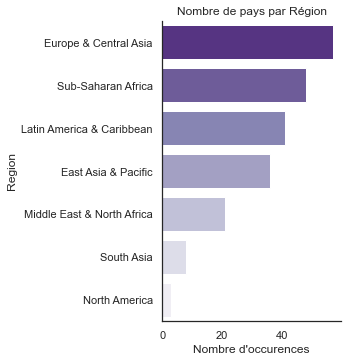

In [15]:
sns.catplot(y = "Region", kind = "count", data = country, order =  country['Region'].value_counts().index, 
            palette='Purples_r')
plt.xlabel("Nombre d'occurences")
plt.title('Nombre de pays par Région');

- la région Europe / Asie Centrale comporte le plus de pays suivie de l'Afrique Sub-Saharienne
- les régions Amérique du Nord et Asie du sud comportent le moins de pays 

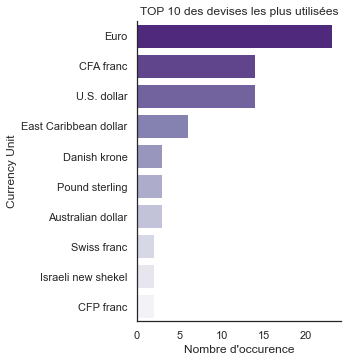

In [16]:
sns.catplot(y = "Currency Unit", kind = "count", data = country, 
            order = country['Currency Unit'].value_counts().index[0:10], 
            palette='Purples_r')
plt.xlabel("Nombre d'occurence")
plt.title('TOP 10 des devises les plus utilisées');

- L'Euro est la devise utilisée par le plus de pays suivi par le franc CFA et le dollar à quasi égalité
- Le franc Suisse, le New Shekel Israélien et le franc CFP sont les devises utilisées par le moins de pays

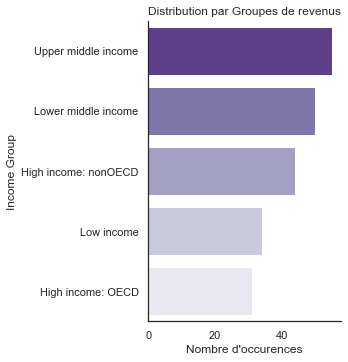

In [17]:
sns.catplot(y = "Income Group", kind = "count",data = country, 
            order = country['Income Group'].value_counts().index, palette='Purples_r')
plt.xlabel("Nombre d'occurences")
plt.title('Distribution par Groupes de revenus');

- le groupe des revenus moyens supérieurs suivi de celui des revenus moyens inférieurs sont les plus représentés
- le groupe des revenus bas et des hauts revenus (OCDE) sont les moins représentés

**Visualisation des graphs sous forme de grille à l'aide de GridSpec**

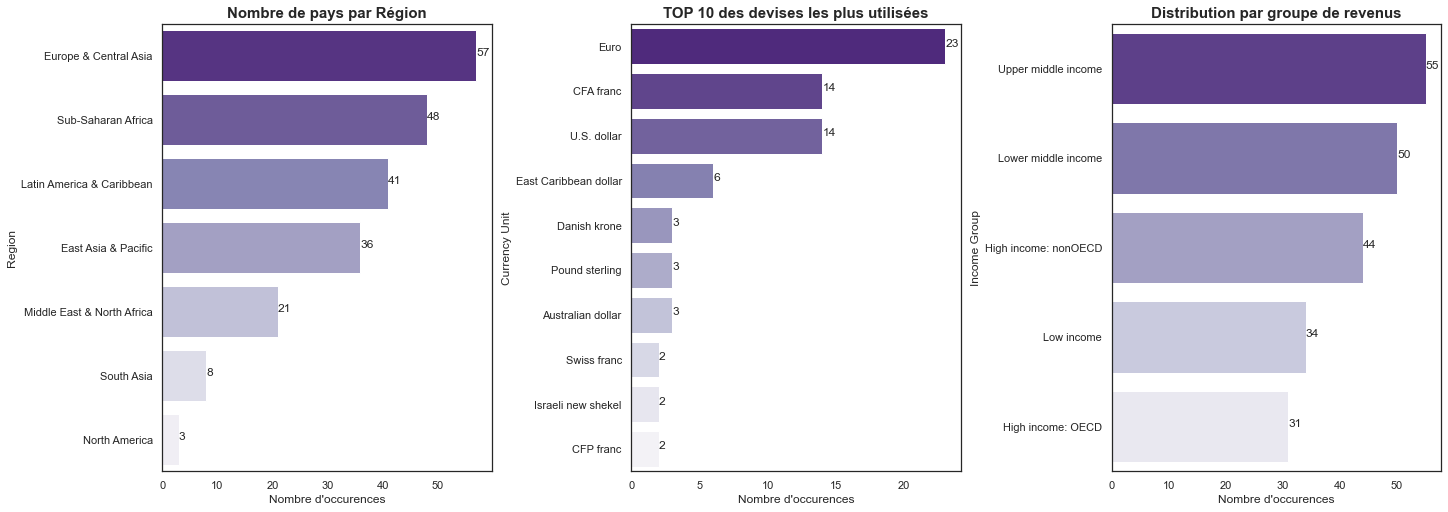

In [18]:
# Les graphiques élaborés à l'aide de catplot ne fonctionnant pas avec GridSpec, j'ai utilisé à la place countplot.
# J'ai également apporté quelques améliorations comme l'affichage des étiquettes.

# Initialisation de la grille avec 1 ligne et 3 colonnes
fig = plt.figure(figsize=(20,7), constrained_layout=True)
gs = GridSpec(nrows=1, ncols=3, figure=fig)

# Premier graphique
ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
ax1 = sns.countplot(y = 'Region', data = country, 
                  order = country['Region'].value_counts().index,
                  palette = 'Purples_r') # plot
plt.title('Nombre de pays par Région', fontweight = 'bold', fontsize = 15)# titre du plot
plt.xlabel("Nombre d'occurences", fontsize = 12) # label axe des abscisses


# Pour afficher les étiquettes
for p in ax1.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax1.annotate(etiquette,(x,y))

    
# Deuxième graphique
ax2 = fig.add_subplot(gs[0,1]) 
ax2 = sns.countplot(y = 'Currency Unit', data = country,
                   order = country['Currency Unit'].value_counts().index[0:10],
                   palette='Purples_r')
plt.title('TOP 10 des devises les plus utilisées', fontweight='bold', fontsize = 15)
plt.xlabel("Nombre d'occurences", fontsize = 12)

for p in ax2.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax2.annotate(etiquette,(x,y))

    
# Troisième graphique
ax3 = fig.add_subplot(gs[0,2]) 
ax3 = sns.countplot(y = 'Income Group', data = country, 
                    order = country['Income Group'].value_counts().index,
                    palette='Purples_r')
plt.title('Distribution par groupe de revenus', fontweight='bold', fontsize = 15)
plt.xlabel("Nombre d'occurences", fontsize = 12)

for p in ax3.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax3.annotate(etiquette,(x,y))

plt.show()

**Données manquantes et taux de complétion**

In [19]:
def completion_plots_h(data):
    ''' fonction qui prend un dataframe en entrée et retourne 2 diagrammes en barres au format vertical représentant le pourcentage 
    de données manquantes et le pourcentage de données non manquantes du dataset. Cette fonction nécessite que
    soit chargée auparavant la fonction describe_variables '''   
    
    # Initialisation de la grille avec 1 ligne et 2 colonnes
    fig = plt.figure(figsize=(18,8), constrained_layout=True)
    gs = GridSpec(nrows=1, ncols=2, figure=fig)

    # Premier graphique
    ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
    ax1 = sns.barplot(y = 'Variable name', x = '% NaN', data = describe_variables(data), palette='Purples_r')
    plt.title('% de NaN', fontweight = 'bold', fontsize = 15)
    plt.ylabel("", fontsize = 12)
    plt.xlabel("% NaN", fontsize = 12)

    for item in ax1.get_xticklabels(): # rotation axe des abscisses
        item.set_rotation(0)
        
    for p in ax1.patches:
        etiquette ='{:,.0f}'.format(p.get_width())
        width, height = p.get_width(),p.get_height()
        x = p.get_x() + width + 0.02
        y = p.get_y() + height / 2
        ax1.annotate(etiquette,(x,y))


    # Deuxième graphique
    ax2 = fig.add_subplot(gs[0,1]) # emplacement dans la grille
    ax2 = sns.barplot(y = 'Variable name', x = '% Not NaN', data = describe_variables(data), palette='Purples_r')
    plt.title('% Not NaN', fontweight = 'bold', fontsize = 15)
    plt.ylabel("", fontsize = 12)
    plt.xlabel("% Not NaN", fontsize = 12)

    for item in ax2.get_xticklabels(): # rotation axe des abscisses
        item.set_rotation(0)
    
    for p in ax2.patches:
        etiquette ='{:,.0f}'.format(p.get_width())
        width, height = p.get_width(),p.get_height()
        x = p.get_x() + width + 0.02
        y = p.get_y() + height / 2
        ax2.annotate(etiquette,(x,y))
        
plt.show()

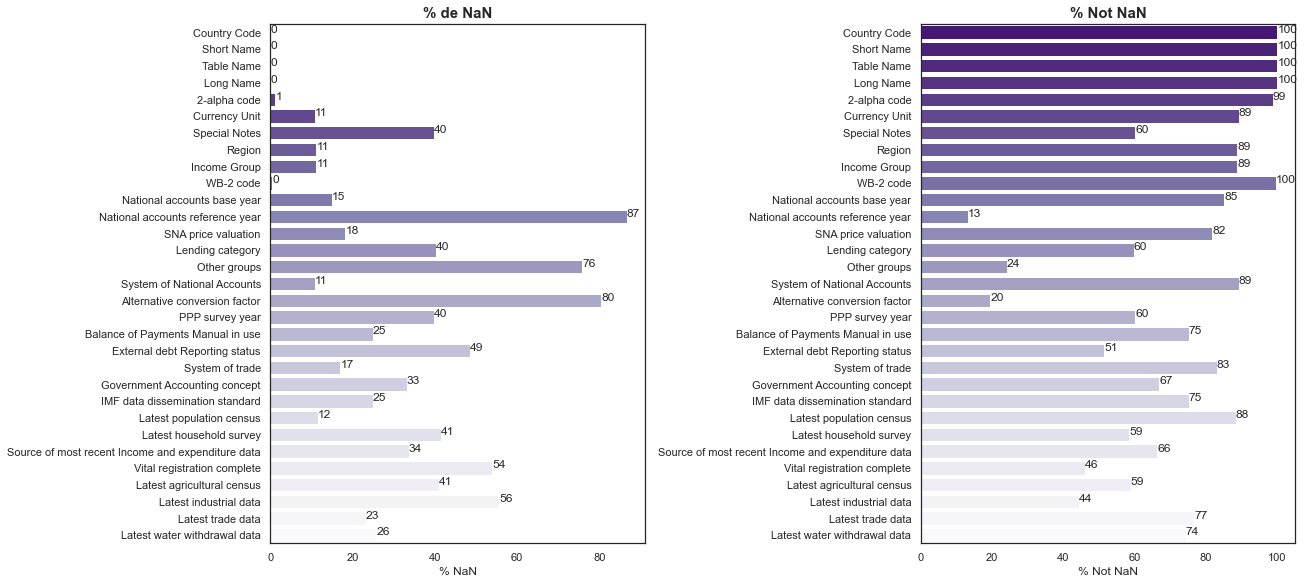

In [20]:
completion_plots_h(country)

**Variables d'intérêt**

Les variables qui paraissent les plus en lien avec la problématique et ne comportant pas trop de valeurs manquantes sont:
- Region (11.20 % de valeurs manquantes)
- Income Group (11.20 % de valeurs manquantes)

### Country-Series <a class="anchor" id="country_series"></a>

Le fichier EdStatsCountry-Series.csv contient pour chaque identifiant pays (CountryCode), les codes utilisés pour définir les sources de données (SeriesCode) et leur description (DESCRIPTION).

**Vérification de l'import**

In [21]:
# Visualisation des 5 premières lignes du dataset
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [22]:
country_series.shape

(613, 4)

In [23]:
# % de valeurs manquantes par colonne
print(f'% de valeurs manquantes par colonne du dataset country_series:\n \n{country_series.isna().mean().sort_values(ascending = False).round(4) * 100}')

% de valeurs manquantes par colonne du dataset country_series:
 
Unnamed: 3     100.0
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
dtype: float64


In [24]:
# Suppression les colonnes avec 100% de données manquantes
country_series = country_series.dropna(how='all', axis = 'columns', inplace = False)

**Description des variables**

In [25]:
describe_variables(country_series)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,CountryCode,object,ABW,613,211,34.42,613,100.0,0,0.0,,,,,,,,,,
1,SeriesCode,object,SP.POP.TOTL,613,21,3.43,613,100.0,0,0.0,,,,,,,,,,
2,DESCRIPTION,object,Data sources : United Nations World Population...,613,97,15.82,613,100.0,0,0.0,,,,,,,,,,


- le dataset contient 613 lignes et 3 colonnes (hors Unnamed: 3, supprimée car 100% de données manquantes)
- aucune valeur manquante dans les variables
- les variables sont de type objet, c'est à dire texte
- on peut noter que ce dataset contient 211 pays distincts vs 241 dans edStats_country
- la colonne DESCRIPTION a plus de modalités que SeriesCode (97 vs 21) => champs probablement pas harmonisés

**Pays qui diffèrent entre Country_series et Country**

In [26]:
country[ ~ country['Country Code'].isin(country_series['CountryCode'].unique())][['Short Name']]

,Short Name
5,Arab World
47,Curaçao
57,East Asia & Pacific (developing only)
58,East Asia & Pacific (all income levels)
59,Europe & Central Asia (developing only)
60,Europe & Central Asia (all income levels)
63,Euro area
68,European Union
89,High income
92,Heavily indebted poor countries (HIPC)


- le dataset edStats_country contient les regroupements de pays type "World" ou régions par exemple
- on peut également noter que les groupements par revenus sont présents dans le premier dataset edStats_country
- nous pouvons en déduire que le premier dataset contient des sous-totaux qui ne doivent donc pas être pris en compte

**Doublons**

In [27]:
# Vérification du nombre de doublons sur le CountryCode
country_series.duplicated(subset=['CountryCode']).sum()

402

In [28]:
# Affichage des lignes dupliquées du dataset
country_series[country_series.duplicated('CountryCode')].head()

,CountryCode,SeriesCode,DESCRIPTION
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.


La colonne CountryCode contient plusieurs fois le même code car il existe plusieurs indicateurs (SeriesCode) qui peuvent être associés à un pays.

In [29]:
# Vérification du nombre de doublons sur le CountryCode et SeriesCode
country_series.duplicated(subset=['CountryCode', 'SeriesCode']).sum()

0

**Variables d'intérêt**

Ces variables ne semblent pas répondre directement à la problématique. Elles pourraient apporter des informations supplémentaires sur la méthode utilisée pour les estimations par exemple.
Seule la colonne CountryCode ne semblant pas représenter de sous totaux ou regroupements pourrait servir à l'analyse.

### Series <a class="anchor" id="series"></a>

Le fichier EdStatsSeries.csv contient la description des indicateurs utilisés.

**Vérification de l'import**

In [30]:
# Visualisation des 5 premières lignes du dataset
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
series.shape

(3665, 21)

In [32]:
# Suppression les colonnes avec 100% de données manquantes
series = series.dropna(how='all', axis = 'columns', inplace = False)

**Doublons**

In [33]:
series.duplicated('Series Code').sum()

0

**Description des variables**

In [34]:
describe_variables(series)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,Series Code,object,BAR.NOED.1519.FE.ZS,3665,3665,100.00,3665,100.00,0,0.00,,,,,,,,,,
1,Topic,object,Attainment,3665,37,1.01,3665,100.00,0,0.00,,,,,,,,,,
2,Indicator Name,object,Barro-Lee: Percentage of female population age...,3665,3665,100.00,3665,100.00,0,0.00,,,,,,,,,,
3,Short definition,object,Percentage of female population age 15-19 with...,3665,1169,31.90,2156,58.83,1509,41.17,,,,,,,,,,
4,Long definition,object,Percentage of female population age 15-19 with...,3665,2060,56.21,3665,100.00,0,0.00,,,,,,,,,,
5,Periodicity,object,Annual,3665,1,0.03,99,2.70,3566,97.30,,,,,,,,,,
6,Base Period,object,2010,3665,4,0.11,314,8.57,3351,91.43,,,,,,,,,,
7,Other notes,object,EGRA,3665,14,0.38,552,15.06,3113,84.94,,,,,,,,,,
8,Aggregation method,object,Weighted average,3665,3,0.08,47,1.28,3618,98.72,,,,,,,,,,
9,Limitations and exceptions,object,Operators have traditionally been the main sou...,3665,9,0.25,14,0.38,3651,99.62,,,,,,,,,,


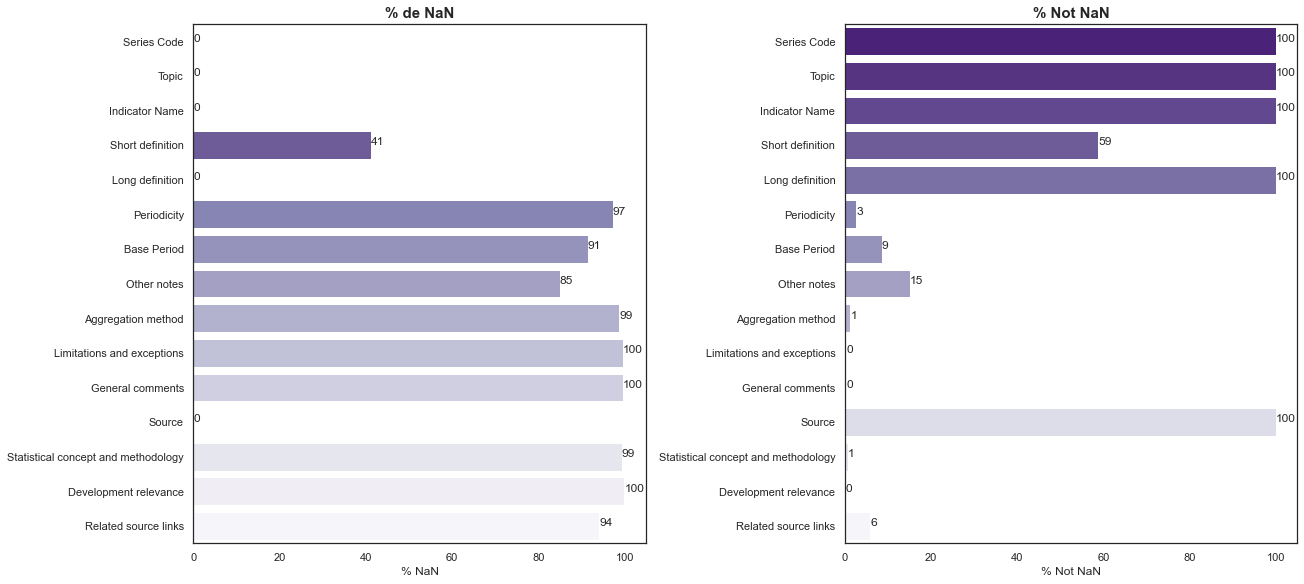

In [35]:
completion_plots_h(series)

- le dataset contient 3665 lignes et 15 colonnes (après suppression des colonnes composées à 100% de NaN)
- une majorité de colonnes contenant des données manquantes à plus de 90%
- les variables les plus complètes sont celles liées aux indicateurs ainsi que leur source
- les autres variables sont de type objet, c'est à dire texte
- il y a 3665 indicateurs différents regroupés par Topics

**Focus sur les indicateurs**

In [36]:
# Nombre d'indicateurs par topic
series.groupby('Topic')['Series Code'].count().sort_values(ascending = False).reset_index().iloc[0:10]

,Topic,Series Code
0,Learning Outcomes,1046
1,Attainment,733
2,Education Equality,426
3,Secondary,256
4,Primary,248
5,Population,213
6,Tertiary,158
7,Teachers,137
8,Expenditures,93
9,Engaging the Private Sector (SABER),51


**Topic**

On repère déjà certains topics liés à notre problématique comme: secondary, tertiary, population...

On remarque 3 665 indicateurs et 1 169 définitions courtes. Pour savoir si ces indicateurs ont un lien avec la problématique, nous allons tenter de repérer les mots qui reviennent le plus souvent.

In [37]:
# Liste des topics
print(series['Topic'].unique().tolist())

['Attainment', 'Education Equality', 'Infrastructure: Communications', 'Learning Outcomes', 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: Purchasing power parity', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Teachers', 'Education Management Information Systems (SABER)', 'Early Child Development (SABER)', 'Engaging the Private Sector (SABER)', 'School Health and School Feeding (SABER)', 'School Autonomy and Accountability (SABER)', 'School Finance (SABER)', 'Student Assessment (SABER)', 'Teachers (SABER)', 'Tertiary Education (SABER)', 'Workforce Development (SABER)', 'Literacy', 'Background', 'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education', 'Pre-Primary', 'Expenditures', 'Health: Risk factors', 'Health: Mortality', 'Social Protection & Labor: Labor force structure', 'Laber', 'So

La librairie collections permet de comptabiliser le nombre de fois que des mots apparaissent dans une liste.

In [38]:
print(collections.Counter(series['Topic']))

Counter({'Learning Outcomes': 1046, 'Attainment': 733, 'Education Equality': 426, 'Secondary': 256, 'Primary': 248, 'Population': 213, 'Tertiary': 158, 'Teachers': 137, 'Expenditures': 93, 'Engaging the Private Sector (SABER)': 51, 'Literacy': 32, 'School Autonomy and Accountability (SABER)': 29, 'Teachers (SABER)': 29, 'Early Childhood Education': 24, 'Education Management Information Systems (SABER)': 23, 'Post-Secondary/Non-Tertiary': 19, 'School Finance (SABER)': 18, 'Tertiary Education (SABER)': 17, 'Student Assessment (SABER)': 15, 'Pre-Primary': 14, 'Health: Population: Structure': 13, 'Early Child Development (SABER)': 12, 'Workforce Development (SABER)': 12, 'Social Protection & Labor: Labor force structure': 11, 'School Health and School Feeding (SABER)': 9, 'Economic Policy & Debt: Purchasing power parity': 6, 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators': 3, 'Laber': 3, 'Social Protection & Labor: Unemployment': 3, 'Infrastructure:

Certains topics commençant par le même mot pourraient être sommés. C'est le cas par exemple de:

- Teachers (SABER) et Teachers
- Health: Population: Dynamics et Health: Mortality et Health: Risk factors
- Tertiary et Tertiary Education (SABER)
- School Finance (SABER) et School Autonomy and Accountability (SABER) et School Health and School Feeding (SABER)
- ...

Pour ce faire, nous allons prendre uniquement le premier mot de chaque topic et afficherons les 10 topics qui reviennent le plus.

In [39]:
# Pour chaque élément de la liste Topic, je scinde mon élément en plusieurs mots à partir du délimiteur espace
# Je choisis l'indice [0] correspondant au premier élément 
topic_first_element = [i.split(' ')[0] for i in series['Topic'].tolist()] 

# J'affiche les 10 Topics qui reviennent le plus
print(collections.Counter(topic_first_element).most_common(10))

# J'enregistre ces 10 Topics dans une variable
most_common_topic = collections.Counter(topic_first_element).most_common(10)

[('Learning', 1046), ('Attainment', 733), ('Education', 449), ('Secondary', 256), ('Primary', 248), ('Population', 213), ('Tertiary', 175), ('Teachers', 166), ('Expenditures', 93), ('School', 56)]


In [40]:
# Passage sous dataframe afin de pouvoir visualiser les données sous forme de graphique
most_common_topic = pd.DataFrame(most_common_topic, 
                                 columns = ['Topic', 'Nombre d\'occurences']).sort_values(by = 'Nombre d\'occurences', 
                                                                                         ascending=False)

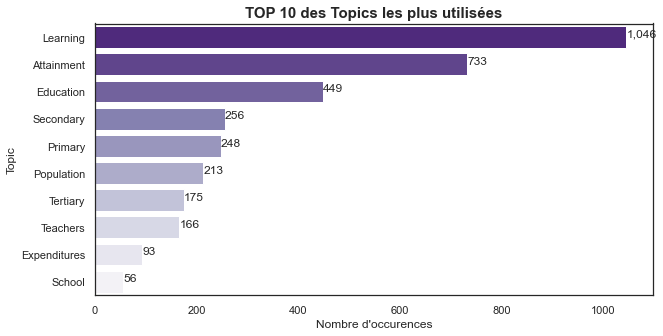

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y = 'Topic', x = 'Nombre d\'occurences', data = most_common_topic, palette='Purples_r')
plt.title('TOP 10 des Topics les plus utilisées', fontweight='bold', fontsize = 15);

total = len(most_common_topic['Topic'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y()+height / 2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/topics.png')

- les topics qui reviennent le plus sont Learning (éducation) et Attainment (réussite des objectifs)
- on retrouve donc bien des données en lien l'éducation ce qui nous permet de continuer nos analyses pour répondre à la problématique
- les topics les plus utilisés qui pourraient nous intéresser pour répondre à la problématique sont: Learning, Education, Secondary, Population et Tertiary

Penchons nous maintenant sur les indicateurs.

**Indicator Name**

In [42]:
# Liste des Indicator Name
series['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [43]:
# Calcul du nombre de fois qu'apparait chaque mot contenu dans Indicator Name
series['Indicator Name'].str.split(expand=True).stack().value_counts().head(10)

of            2440
in             897
(%)            807
age            799
Percentage     759
Grade          706
female         644
students       594
by             588
level          549
dtype: int64

On remarque la présence de mots tels que of, in, by etc qui n'ont aucun intérêt pour l'analyse. Nous allons passer par une librairie de traitement du langage naturel (NLP) afin de ne récupérer que les mots ayant un intérêt:

In [44]:
# Chargement des librairies pour la tokenisation (par mot et par phrase)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [45]:
# Librairies pour filtrer les "Stop Words" (mots à ignorer tels que: in, of, the...)
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Sélection de la langue des stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [47]:
# Je split la colonne Indicator Name en plusieurs mots et je stack pour afficher sur une colonne
liste_mots_IndicatorName = series['Indicator Name'].str.split(expand=True).stack().tolist()

In [48]:
# J'enlève les stop words en parcourant chaque mot de la liste (j'ignore les majuscules et minuscules avec .casefold())
liste_mots_IndicatorName_filtree = [word for word in liste_mots_IndicatorName if word.casefold() not in stopwords]

In [49]:
# On passe par la librairie collection qui permet de comptabiliser le nombre de mots identiques dans une liste
liste_mots_IndicatorName_filtree = collections.Counter(liste_mots_IndicatorName_filtree).most_common(20)

In [50]:
# Certains mots sont inutiles, rajoutons les à la liste des stopwords
newStopWords = ['(%)','(%).', '-']
stopwords.extend(newStopWords)

In [51]:
# J'enlève les stopwords suite à la modification de la liste
liste_mots_IndicatorName_filtree = [word for word in liste_mots_IndicatorName if word.casefold() not in stopwords]

In [52]:
# Je comptabilise le nombre de mots identiques dans la liste
print(collections.Counter(liste_mots_IndicatorName_filtree).most_common(20))

[('age', 799), ('Percentage', 759), ('Grade', 706), ('female', 644), ('students', 594), ('level', 549), ('population', 499), ('secondary', 449), ('primary', 441), ('EGRA:', 403), ('grade', 397), ('education,', 386), ('Barro-Lee:', 360), ('education', 351), ('male', 337), ('2nd', 323), ('sexes', 317), ('Projection:', 308), ('lower', 303), ('educational', 289)]


In [53]:
# J'enregistre ces 20 indicateurs dans une variable et je transforme en dataframe afin de pouvoir visualiser 
# les données sous forme de graphique
most_common_indic = collections.Counter(liste_mots_IndicatorName_filtree).most_common(20)

most_common_indic = pd.DataFrame(most_common_indic, 
                                 columns = ['Indicateurs', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', 
                                                                                         ascending=False)

In [54]:
most_common_indic.head()

,Indicateurs,Nombre d'occurences
0,age,799
1,Percentage,759
2,Grade,706
3,female,644
4,students,594


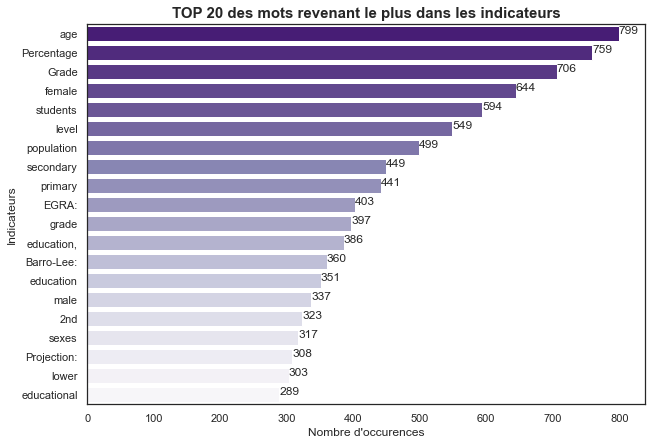

In [55]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(y = 'Indicateurs', x = 'Nombre d\'occurences', data = most_common_indic, palette='Purples_r')
plt.title('TOP 20 des mots revenant le plus dans les indicateurs', fontweight ='bold', fontsize = 15);

total = len(most_common_indic['Indicateurs'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/indic_words.png')

Parmi les mots composant les indicateurs on pourrait garder en tête de pouvoir filtrer les données sur les mots:
- age
- grade
- students
- population
- secondary
- education
- projection

Pour terminer cette analyse, nous pouvons également récupérer le mot par lequel commence l'indicateur.

In [56]:
# Pour chaque élément de la liste Indicator Name, je scinde mon élément en plusieurs mots à partir du délimiteur espace
# Je choisis l'indice [0] correspondant au premier élément 
indic_first_element = [i.split(' ')[0] for i in series['Indicator Name'].tolist()] 

# J'affiche les 20 indicateurs qui reviennent le plus
print(collections.Counter(indic_first_element).most_common(20))

# J'enregistre ces 20 indicateurs dans une variable
most_common_indic = collections.Counter(indic_first_element).most_common(20)

[('EGRA:', 403), ('Barro-Lee:', 360), ('Projection:', 308), ('UIS:', 241), ('Percentage', 239), ('SABER:', 215), ('PASEC:', 140), ('Population,', 133), ('DHS:', 130), ('LLECE:', 127), ('MICS:', 120), ('Enrolment', 103), ('Africa', 101), ('TIMSS:', 100), ('PISA:', 99), ('PIAAC:', 98), ('Gross', 61), ('SACMEQ:', 54), ('Age', 52), ('Government', 43)]


In [57]:
# Passage sous dataframe afin de pouvoir visualiser les données sous forme de graphique
most_common_indic = pd.DataFrame(most_common_indic, 
                                 columns = ['Indicateurs', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', 
                                                                                         ascending=False)

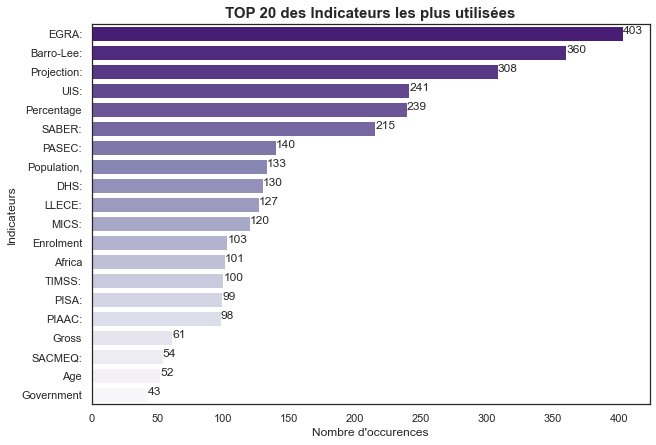

In [58]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(y = 'Indicateurs', x = 'Nombre d\'occurences', data = most_common_indic, palette='Purples_r')
plt.title('TOP 20 des Indicateurs les plus utilisées', fontweight='bold', fontsize = 15);

for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))

Ces indicateurs confirment l'hypothèse que les données du dataset sont bien en lien avec des données sur l'éduction.

On peut citer:
- EGRA: évaluation des compétences fondamentales en lecture
- Barro-Lee: évaluation du niveau d'instruction
- UIS: Institut de statistiques de l'UNESCO
- SABER: Systems Approach for Better Education Results
- PASEC: évolution des performances des systèmes éducatifs
- DHS: données sur l'éducation  permettant des analyses démographiques et de santé par niveau d'éducation
- MICS: Education Analysis for Global Learning and Equity
- PISA: Programme International pour le suivi des acquis des élèves 

**Variables d'intérêt**

Les variables SeriesCode, Topic et celles qui concernent les indicateurs sont en lien avec notre problématique et serviront à définir les KPIs sur lesquels se baser pour définir les pays à cibler.

### Footnote <a class="anchor" id="footnote"></a>

Ce dataset nous fournit le mode de calcul des indicateurs utilisés par pays ainsi que l'année de référence.

**Vérification de l'import**

In [59]:
# Visualisation des 5 premières lignes du dataset
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [60]:
footnote.shape

(643638, 5)

In [61]:
# Suppression les colonnes avec 100% de données manquantes
footnote = footnote.dropna(how='all', axis = 'columns', inplace = False)

**Doublons**

In [62]:
footnote.duplicated().sum()

0

**Description des variables**

In [63]:
# Description des variables
describe_variables(footnote)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,CountryCode,object,ABW,643638,239,0.04,643638,100.0,0,0.0,,,,,,,,,,
1,SeriesCode,object,SE.PRE.ENRL.FE,643638,1558,0.24,643638,100.0,0,0.0,,,,,,,,,,
2,Year,object,YR2001,643638,56,0.01,643638,100.0,0,0.0,,,,,,,,,,
3,DESCRIPTION,object,Country estimation.,643638,9102,1.41,643638,100.0,0,0.0,,,,,,,,,,


In [64]:
footnote.shape

(643638, 4)

In [65]:
# Exemples de modalités de la variable SeriesCode
print(footnote['SeriesCode'].nunique())
print(footnote['SeriesCode'].unique().tolist()[0:15])

1558
['SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'SE.PRE.TCHR.FE', 'SE.SEC.ENRL.GC', 'SE.PRE.TCHR', 'SE.PRE.NENR', 'SE.SEC.ENRL.VO.FE', 'SE.PRM.TCHR.FE', 'SE.PRE.TCHR.FE.ZS', 'SE.PRE.ENRL', 'SE.PRE.NENR.FE', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.TCHR.FE', 'SE.SEC.ENRL.VO', 'SE.PRE.NENR.MA']


In [66]:
# Ces codes sont-ils les mêmes que ceux de series?
code_footnote_identiques = footnote[footnote['SeriesCode'].isin(
    series['Series Code'].unique())][['SeriesCode']]

print(code_footnote_identiques['SeriesCode'].nunique())
print()
print(code_footnote_identiques['SeriesCode'].unique().tolist()[0:30])

1452

['SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'SE.PRE.TCHR.FE', 'SE.SEC.ENRL.GC', 'SE.PRE.TCHR', 'SE.PRE.NENR', 'SE.SEC.ENRL.VO.FE', 'SE.PRM.TCHR.FE', 'SE.PRE.TCHR.FE.ZS', 'SE.PRE.ENRL', 'SE.PRE.NENR.FE', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.TCHR.FE', 'SE.SEC.ENRL.VO', 'SE.PRE.NENR.MA', 'SE.PRM.NINT.FE.ZS', 'SE.PRM.NINT.MA.ZS', 'SE.PRM.NINT.ZS', 'SE.PRM.UNER', 'SE.PRM.UNER.FE', 'SE.PRM.UNER.MA', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS', 'SE.TER.GRAD.ED.FE.ZS', 'SE.TER.GRAD.EN.FE.ZS', 'SE.TER.GRAD.FE.ZS', 'SE.TER.GRAD.HL.FE.ZS']


In [67]:
# Regardons maintenant les codes qui diffèrent
code_footnote_differents = footnote[~footnote['SeriesCode'].isin(
    series['Series Code'].unique())][['SeriesCode']]

print(code_footnote_differents['SeriesCode'].nunique())
print()
print(code_footnote_differents['SeriesCode'].unique().tolist())

106

['UIS.XSpendP.23.FDpub.FNs', 'UIS.GER.1T6.F', 'UIS.GER.1T6.M', 'UIS.LP.AG15T24', 'UIS.LP.AG15T24.F', 'UIS.LP.AG15T24.M', 'UIS.LP.AG15T99', 'UIS.LP.AG15T99.F', 'UIS.LP.AG65', 'UIS.LP.AG65.M', 'UIS.LPP.AG15T99', 'UIS.LPP.AG65', 'UIS.LR.AG15T99.GPI', 'UIS.LR.AG65.F', 'UIS.LR.AG65.M', 'UIS.NIR.1.AGM1', 'UIS.NIR.1.AGM1.F', 'UIS.NIR.1.AGM1.M', 'UIS.NIR.1.AGP1', 'UIS.NIR.1.AGP1.F', 'UIS.NIR.1.AGP1.M', 'UIS.OE.56.40510', 'UIS.SLE.1T6.GPI', 'UIS.XGovExp.IMF.2', 'UIS.XGovExp.IMF.3', 'UIS.XSpendP.2.FDpub.FNcap', 'UIS.XSpendP.2.FDpub.FNcur', 'UIS.XSpendP.2.FDpub.FNnons', 'UIS.XSpendP.2.FDpub.FNs', 'UIS.XSpendP.3.FDpub.FNcap', 'UIS.XSpendP.3.FDpub.FNcur', 'UIS.XSpendP.3.FDpub.FNnons', 'UIS.XSpendP.3.FDpub.FNs', 'UIS.XUNIT.GDPcap.2.FSgov', 'UIS.XUNIT.GDPcap.3.FSgov', 'SE.SEC.ENRR.UP.FE', 'UIS.E.1.PU', 'UIS.E.1.PU.F', 'UIS.E.23.PU', 'UIS.E.23.PU.F', 'UIS.E.3.PU.F', 'UIS.GER.1T6.GPI', 'UIS.LP.Ag15t99.M', 'UIS.LPP.Ag15t24', 'UIS.AIR.1.GLAST.GPI', 'UIS.SR.1.GLAST.GPI', 'UIS.XGDP.FSGOV.FDINSTADM.FFD

- sur les 1 558 codes de footnote, seuls 106 indicateurs n'ont pas été retrouvés dans le dataset series

In [68]:
# Années analysées dans le dataset
print(footnote['Year'].unique())
len(footnote['Year'].unique())

['YR2001' 'YR2005' 'YR2000' 'YR2004' 'YR2006' 'YR2003' 'YR1999' 'YR2008'
 'YR2002' 'YR2007' 'YR2017' 'YR2010' 'YR2009' 'YR2011' 'YR2012' 'YR2015'
 'YR2014' 'YR1970' 'YR1971' 'YR1972' 'YR1973' 'YR1974' 'YR1975' 'YR1976'
 'YR1977' 'YR1978' 'YR1979' 'YR1980' 'YR1981' 'YR1982' 'YR1983' 'YR1984'
 'YR1985' 'YR1986' 'YR1987' 'YR1988' 'YR1989' 'YR1990' 'YR1991' 'YR1992'
 'YR1993' 'YR1994' 'YR1995' 'YR1996' 'YR1997' 'YR1998' 'YR2013' 'YR2016'
 'YR2020' 'YR2025' 'YR2030' 'YR2035' 'YR2040' 'YR2045' 'YR2050' 'yr2012']


56

In [69]:
# Afin de pouvoir classer en ordre croissant ces années, enlevons le préfixe YR
years = footnote['Year'].apply(lambda x : x[2:]).sort_values().unique()
print(years)

['1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025'
 '2030' '2035' '2040' '2045' '2050']


In [70]:
print(f'Période analysée: {int(years[-1]) - int(years[0])} ans')

Période analysée: 80 ans


La période d'analyse s'étend de 1970 à 2050 soit sur 80 ans.

In [71]:
# Exemples de modalités de la variable DESCRIPTION
print(footnote['DESCRIPTION'].unique().tolist()[0:15])

['Country estimation.', 'UIS Estimation', 'UNESCO Institute for Statistics (UIS) estimate', '5-year average value between 0s and 5s', 'Percentage includes lower secondary education.', 'Country data', 'Country Data', 'UNSD WPP08 revision file 2A and 3A.', 'Not applicable', 'Percentage includes all tertiary levels (ISCED 5-8)', 'Estimated', 'UIS estimation.', '<0.1. Plausible bound is <0.1-0.1', 'Uncertainty bound is 127.1 - 148.2', 'Uncertainty bound is 146.6 - 173.2']


- le dataset contient 643 638 lignes et 4 colonnes (hors Unnamed: 4)
- les autres variables sont de type objet, c'est à dire texte
- on peut noter que ce dataset contient 239 pays distincts vs 211 dans country_series
- la période analysée est de 80 ans (1970 à 2050)
- ce dataset a 1 452 series codes en commun avec le dataset series

**Variables d'intérêt**

La variable Year nous permet de connaitre la période d'analyse et la colonne Description nous permet de connaitre le mode de calcul des indicateurs utilisés par chaque pays: estimation, données du pays etc mais comporte 9 102 modalités.

### Data <a class="anchor" id="data"></a>

Ce dataset reprend par pays et par année le nom, le code des indicateurs utilisés et les valeurs associées.

**Vérification de l'import**

In [72]:
data.tail(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.826958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.540619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data.shape

(886930, 70)

In [74]:
# Suppression les colonnes avec 100% de données manquantes
data = data.dropna(how='all', axis = 'columns', inplace = False)

**Description des variables**

In [75]:
describe_variables(data).head(4)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,Country Name,object,Arab World,886930,242,0.03,886930,100.0,0,0.0,,,,,,,,,,
1,Country Code,object,ARB,886930,242,0.03,886930,100.0,0,0.0,,,,,,,,,,
2,Indicator Name,object,"Adjusted net enrolment rate, lower secondary, ...",886930,3665,0.41,886930,100.0,0,0.0,,,,,,,,,,
3,Indicator Code,object,UIS.NERA.2,886930,3665,0.41,886930,100.0,0,0.0,,,,,,,,,,


In [76]:
describe_variables(data).tail(3)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
66,2090,float64,2.7,886930,7150,0.81,51436,5.8,835494,94.2,711.31,0.23,93.1,10271.59,640182431.05,25301.83,-0.65,0.01,5.46,3354746.27
67,2095,float64,2.7,886930,7044,0.79,51436,5.8,835494,94.2,703.43,0.23,94.13,10410.11,653348935.94,25560.69,-0.55,0.01,4.68,3351886.89
68,2100,float64,2.7,886930,6914,0.78,51436,5.8,835494,94.2,694.03,0.22,95.07,10539.58,662645049.97,25741.89,-0.45,0.01,4.03,3330483.54


In [77]:
# Fonction permettant de rajouter les étiquette en haut de chaque barre

def etiquette_v(ax, espace = 5):
    """Ajoute les étiquettes en haut de chaque barre sur un barplot vertical.

    Arguments:
        ax (matplotlib.axes.Axes): objet matplotlib ocontenant les axes
            du plot à annoter.
        espace (int): distance entre les étiquettes et les barres.
    """

    # Pour chaque barre, placer une étiquette
    for rect in ax.patches:
        # Obtenir le placement de X et Y de l'étiquette à partir du rectangle
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Espace entre la barre et le label
        space = espace
        # Alignement vertical
        va = 'bottom'

        # Si la valeur est négative, placer l'étiquette sous la barre
        if y_value < 0:
            # Valeur opposer de l'argument espace
            space *= -1
            # Alignement vertical 'top'
            va = 'top'

        # Utiliser la valeur Y comme étiquette et formater le nombre avec 0 décimale
        label = "{:.0f}".format(y_value)

        # Créer l'annotation
        ax.annotate(
            label,                      # Utiliser `label` comme label
            (x_value, y_value),         # Placer le label à la fin de la barre
            xytext=(0, space),          # Décaler verticalement l'étiquette de `space`
            textcoords="offset points", # Interpréter `xytext` comme un décalage en points
            ha='center',                # Centrer horizontallement le label
            va=va)                      # Aligner verticalement l'étiquette en fonction de la valeur
                                        # (positive ou negative)


# Permet d'appliquer la fonction
# etiquette_v(ax)

In [78]:
def completion_plots_v(data):
    ''' fonction qui prend un dataframe en entrée et retourne 2 diagrammes en barres au format horizontal représentant 
    le pourcentage de données manquantes et le pourcentage de données non manquantes du dataset. Cette fonction 
    nécessite que soient chargées auparavant les fonctions describe_variables et etiquette_v'''   
    
    # Initialisation de la grille avec 1 ligne et 2 colonnes
    fig = plt.figure(figsize=(25,9), constrained_layout=True)
    gs = GridSpec(nrows=1, ncols=2, figure=fig)

    # Premier graphique
    ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
    ax1 = sns.barplot(x = 'Variable name', y='% NaN', data = describe_variables(data), palette='Purples_r')
    plt.title('% de NaN', fontweight = 'bold', fontsize = 15)
    plt.xlabel("", fontsize = 12)
    plt.ylabel("% NaN", fontsize = 12)
    etiquette_v(ax1, 2)

    for item in ax1.get_xticklabels(): # rotation axe des abscisses
        item.set_rotation(90)
        

    # Deuxième graphique
    ax2 = fig.add_subplot(gs[0,1]) 
    ax2 = sns.barplot(x = 'Variable name', y='% Not NaN', data = describe_variables(data), palette='Purples_r')
    plt.title('% Not NaN', fontweight = 'bold', fontsize = 15)
    plt.xlabel("", fontsize = 12)
    plt.ylabel("% Not NaN", fontsize = 12)
    etiquette_v(ax2, 2)

    for item in ax2.get_xticklabels(): # rotation axe des abscisses
        item.set_rotation(90)

plt.show()

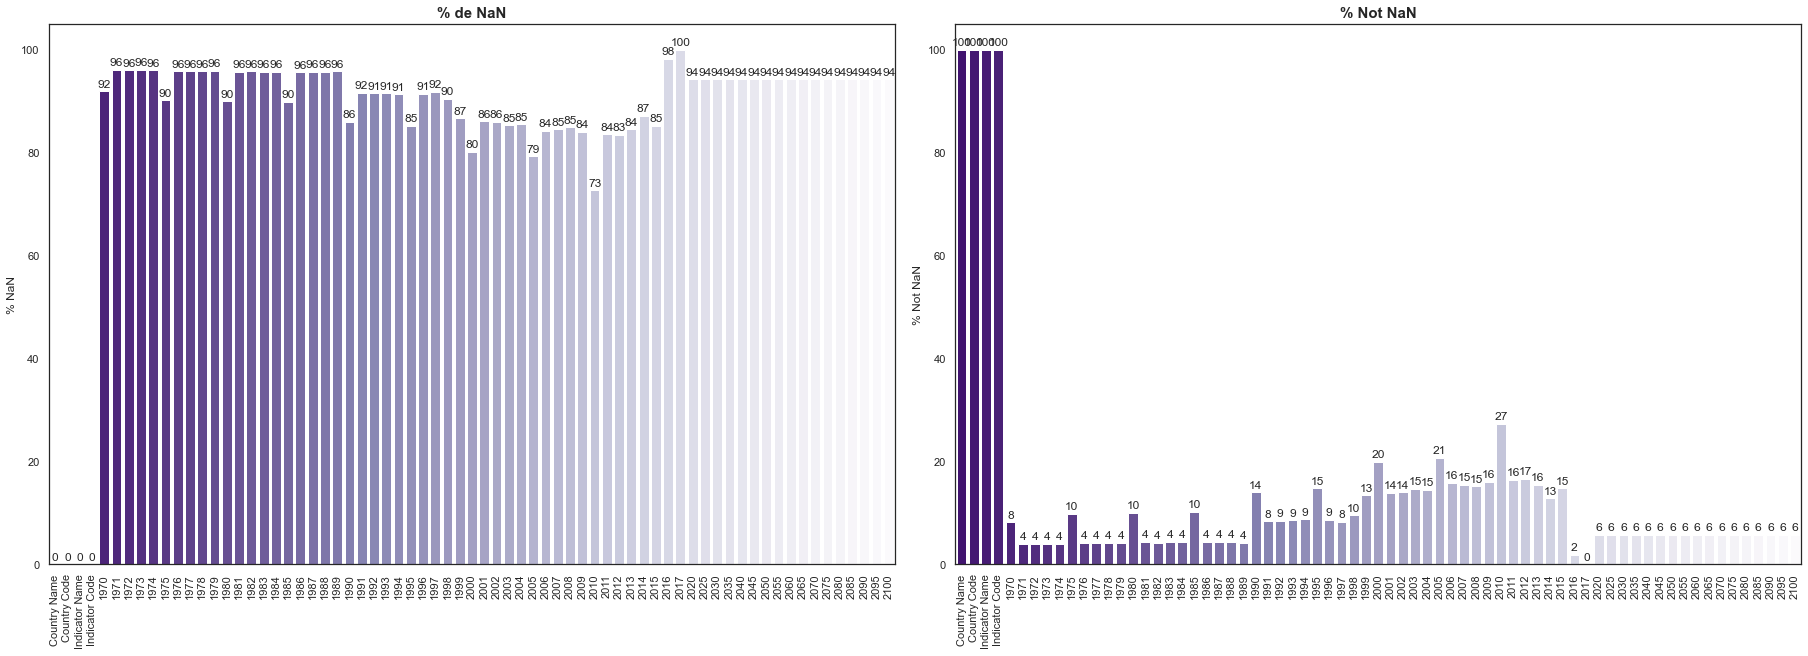

In [79]:
completion_plots_v(data)

- 242 pays sont présents dans ce dataset => aux vues des analyses précédentes, on peut donc en déduire que des sous totaux de regroupements sont présents. Ecart de + 1 pays vs country
- on retrouve bien le même nombre d'indicateurs que dans le dataset series (= variable Series Code)
- les indicateurs sont trop nombreux, comment les exploiter?
- pas de données manquantes pour les variables objet et un grand nombre de données manquantes par année (2010 semble être l'année la plus fournie)

**Pays qui diffèrent entre country_series et data**

Nous avons vu précédemment qu'il valait mieux retenir la liste des pays du dataset country_series car il ne contient pas de regroupements de type World etc.

In [80]:
pays_a_supprimer = data[data['Country Code'].isin(country_series['CountryCode'].unique()) 
                        == False]['Country Code'].unique().tolist()

print(f'Liste des Country Code en trop dans data et à supprimer: \n\n {pays_a_supprimer}')

Liste des Country Code en trop dans data et à supprimer: 

 ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'VGB', 'CUW', 'NRU', 'SXM', 'SSD', 'MAF']


In [81]:
# Nom des pays associés aux Country Codes
print(data[data['Country Code'].isin(pays_a_supprimer)]['Country Name'].unique().tolist())

['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World', 'British Virgin Islands', 'Curacao', 'Nauru', 'Sint Maarten (Dutch part)', 'South Sudan', 'St. Martin (French part)']


## Construction du dataset filtré <a class="anchor" id="filtre"></a>

### Travail préparatoire <a class="anchor" id="prep"></a>

**Création d'une copy du dataset original**

In [82]:
data_copy = data.copy()

**Filtre sur les pays présents uniquement dans country_series**

In [83]:
# Vérifions que l'on a bien 211 pays comme dans country_series
data_copy[~data_copy['Country Code'].isin(pays_a_supprimer)].nunique()['Country Code']

211

In [84]:
# Réaffectation du dataframe filtré dans data_copy
data_copy = data_copy[~data_copy['Country Code'].isin(pays_a_supprimer)]

**Intégration des variables Region et Income Group**

In [85]:
# Merge avec country pour récupérer les variables Region et Income Group
data_copy = pd.merge(data_copy, country[['Country Code', 'Region', 'Income Group']], 
         how = "left", on = ["Country Code"])

**Intégration de la variable Topic**

In [86]:
# On renomme la colonne Series Code de series en Indicator Code pour éviter les risques d'erreurs lors du merge
series = series.rename(columns={'Series Code': 'Indicator Code'}, inplace = False)

In [87]:
# Merge avec series pour récupérer la variable Topic
data_copy = pd.merge(data_copy, series[['Indicator Code', 'Topic']], 
         how = "left", on = ['Indicator Code'])

#data_copy = data_copy.merge(series[['Series Code', 'Topic']],
#                                left_on = 'Indicator Code',
#                                right_on = 'Series Code',
#                                how = 'left')

In [88]:
# On réordonne les colonnes pour une meilleure lisibilité

# data_copy.columns

data_copy = data_copy[['Region','Country Name', 'Country Code', 'Income Group', 
                       'Topic','Indicator Name', 'Indicator Code', '1970', '1971', 
                       '1972', '1973', '1974', '1975', '1976', '1977', '1978',
                       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
                       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                       '2095', '2100']]

data_copy.head(3)

,Region,Country Name,Country Code,Income Group,Topic,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.05987,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.22310,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37913,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Définition de la période d'analyse <a class="anchor" id="periode"></a>

Le dataset contient des colonnes années allant de 1970 à 2100. Il est important de visualiser le nombre de données non manquantes par année afin de pouvoir définir sur quelle période de baser pour l'analyse.

In [89]:
liste_annees = data_copy.iloc[:, (data_copy.columns.str.startswith('19')) | 
                              (data_copy.columns.str.startswith('20')) | 
                              (data_copy.columns.str.startswith('21'))].columns.unique().tolist()


# Pour récupérer l'indice des colonnes représentant une année
#for idx,column in enumerate(data_copy.columns):
#    print(idx,column)

#data_copy.iloc[:,7:71]

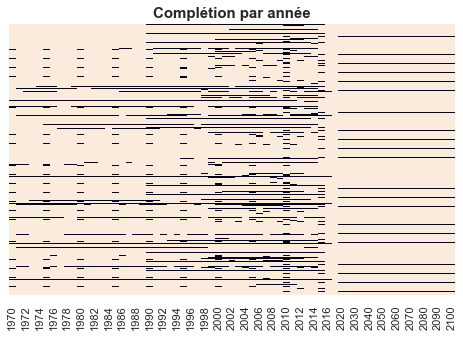

In [90]:
# Visualisation générale des données manquantes
plt.figure(figsize=(8,5))
plt.title('Complétion par année', fontweight = 'bold', fontsize = 15)
sns.heatmap(data_copy.iloc[:,data_copy.columns.isin(liste_annees)].isna(), yticklabels = False, cbar = False);
plt.savefig('img/missing_annees.png')

Les années 2000 et surtout 2010 semblent contenir le plus de données. Visualisons cela plus en détail.

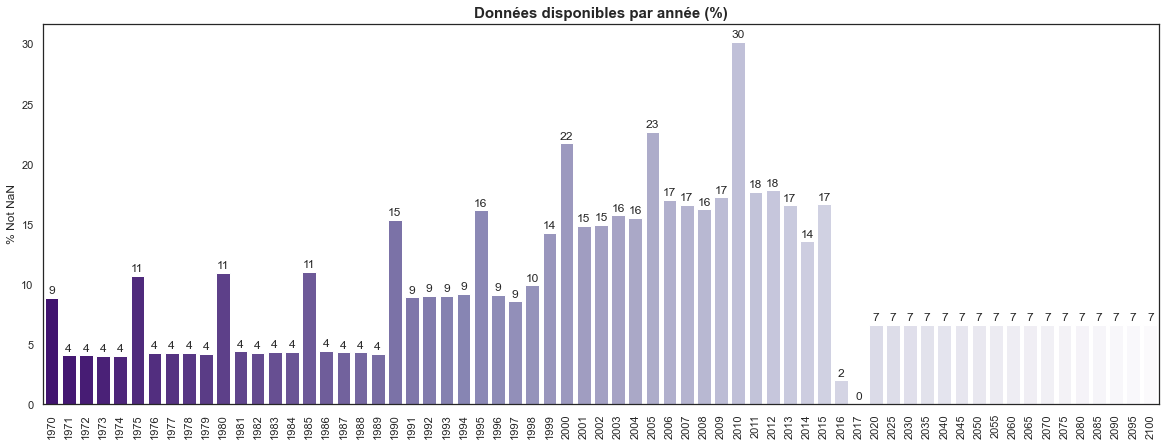

In [91]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x = 'Variable name', y='% Not NaN', data = describe_variables(data_copy[liste_annees]), palette='Purples_r')
plt.title('Données disponibles par année (%)', fontweight = 'bold', fontsize = 15)
plt.xlabel("", fontsize = 12)
plt.ylabel("% Not NaN", fontsize = 12)
etiquette_v(ax, 2)

for item in ax.get_xticklabels(): # rotation axe des abscisses
    item.set_rotation(90)

plt.savefig('img/donnees_disponibles_annee.png')

- nous remarquons des "pics" tous les 5 ans
- aucune donnée disponible pour 2017
- les années 1990 à 2015 semblent contenir le plus de données
- à partir de 2020, le nombre de données disponibles est le même => estimations?

Nous allons réduire la dimension du dataset en ne sélectionnant que les années se terminant par 0 ou 5.

Academy souhaitant proposer des contenus de formation en ligne pour un public de niveau lycée et université, nous allons réduire la période d'analyse aux années supérieures ou égales à l'année 2000.

In [92]:
# Enlèvement des espaces dans le nom des colonnes pour faciliter les manipulations futures
data_copy.columns = data_copy.columns.str.replace(' ', '')
data_copy.columns

Index(['Region', 'CountryName', 'CountryCode', 'IncomeGroup', 'Topic',
       'IndicatorName', 'IndicatorCode', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065',
       '2070', '2075', '2080', '2085', '2090', '2095', '2100'],
      dtype='object')

In [93]:
# Création d'une liste de colonnes à conserver
liste_col_a_conserver = ['Region', 'CountryName', 'CountryCode', 'IncomeGroup', 'Topic', 'IndicatorName', 
                         'IndicatorCode'] + [str(i) for i in range(2000,2101, 5)]

print(liste_col_a_conserver)

['Region', 'CountryName', 'CountryCode', 'IncomeGroup', 'Topic', 'IndicatorName', 'IndicatorCode', '2000', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']


In [94]:
data_copy_year = data_copy.iloc[:, data_copy.columns.isin(liste_col_a_conserver)]

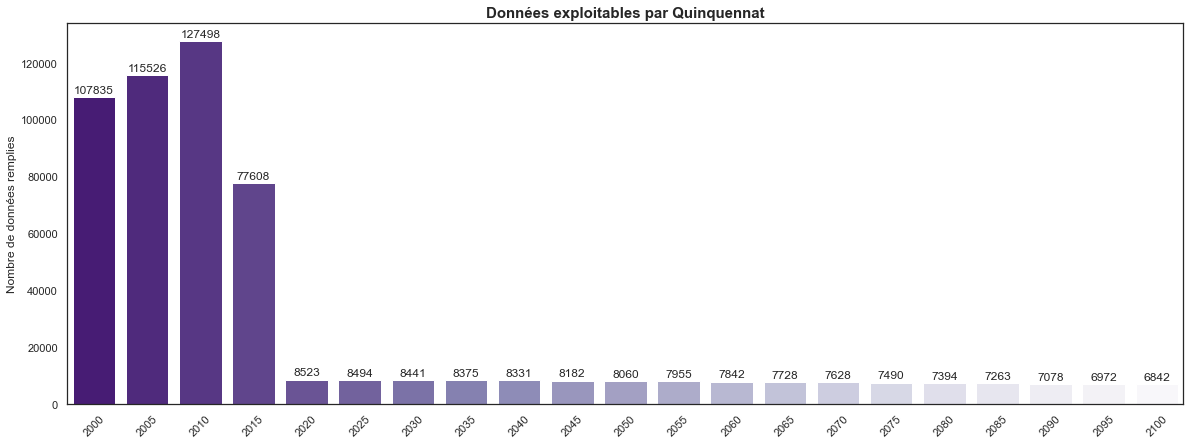

In [95]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x = 'Variable name', y = 'Distinct', data = describe_variables(
    data_copy_year.iloc[:, data_copy_year.columns.str.startswith('2')]), palette='Purples_r')
plt.title('Données exploitables par Quinquennat', fontweight = 'bold', fontsize = 15)
plt.xlabel("", fontsize = 12)
plt.ylabel("Nombre de données remplies", fontsize = 12)
etiquette_v(ax, 2)

for item in ax.get_xticklabels(): # rotation axe des abscisses
    item.set_rotation(45)

In [96]:
data_copy_year.shape

(773315, 28)

### Sélection des indicateurs pertinents <a class="anchor" id="indic"></a>

**Passage du dataframe au format long et suppression des valeurs manquantes**

Les années de data_copy_topics étant au format "wide", il est difficile de les exploiter. Nous allons transformer le dataset au format "long" c'est à dire regrouper les années dans une colonne Year et indiquer leur valeur dans une autre colonne Value.

In [97]:
data_copy_long = pd.melt(data_copy_year,id_vars=['Region','CountryName', 'CountryCode', 'IncomeGroup', 
                                            'Topic','IndicatorName', 'IndicatorCode'],var_name = 'Year', 
                         value_name='Value')

In [98]:
data_copy_long.head()

,Region,CountryName,CountryCode,IncomeGroup,Topic,IndicatorName,IndicatorCode,Year,Value
0,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2000,NaN
1,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,2000,NaN
2,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,2000,NaN
3,South Asia,Afghanistan,AFG,Low income,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,2000,NaN
4,South Asia,Afghanistan,AFG,Low income,Primary,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,2000,NaN


Supprimons maintenant les lignes où la variable Value contient des valeurs manquantes.

In [99]:
# Nombre de données manquantes pour la colonne Value
data_copy_long['Value'].isna().sum()

14664601

In [100]:
# Index des lignes de la colonne Value contenant des données manquantes
index_with_nan = data_copy_long.index[data_copy_long['Value'].isna()]

In [101]:
# Suppression des lignes contenant les données manquantes
data_copy_long_full = data_copy_long.drop(index_with_nan, axis = 0, inplace = False)

In [102]:
# Vérification qu'il reste bien le bon nombre de données
data_copy_long_full.shape[0] == data_copy_long.shape[0] - data_copy_long['Value'].isna().sum()

True

La suppression des données manquantes a diminué le dataset de 14 664 601 lignes. La proportion du nombre de valeurs manquantes par année étant loin d'être négligeable, j'ai choisi de supprimer ces données plutôt que de les compléter par la moyenne ou la médiane par exemple.

In [103]:
data_copy_long_full.shape

(1575014, 9)

**Filtre sur les mots contenus dans les indicateurs avec la plus forte occurence**

Comme remarqué lors de l'analyse du dataset series, certains indicateurs semblent être en lien direct avec notre problématique à savoir quantifier le potentiel d'un pays en vue de son développement commercial. Pour rappel nous avions filtré dans le dataset series les indicateurs ayant le plus d'occurences et nous avions fait une première sélection des plus pertinents: 
- age
- student
- level
- population
- secondary
- education
- projection

Les trois questions principales du projet sont les suivantes : 
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

Nous avons donc besoin d'indicateurs quantitatifs qui nous renseignent sur la population par pays en âge de faire des études secondaires et supérieures. Academy proposant des cours en ligne, il faudrait également rechercher des indicateurs nous renseignant sur l'accès au numérique.

Concernant l'évolution de ce potentiel de clients, nous pourrions visualiser si la tendance de la population (totale, en âge de faire des études secondaires et tertiaires et les plus jeunes) par pays est à la hausse. A noter que ces informations sont peut être présentes dans les indicateurs utilisés de 2020 à 2100.

L'entreprise devra alors opérer dans les pays ayant le plus fort potentiel de clients actuel et futur. Le choix final des pays pourrait également être orienté sur la maîtrise de la langue anglaise par exemple. En effet, la traduction de cours voire de vidéos dans de multiples langues est un processus coûteux.

Afin de réduire un peu la liste des indicateurs, supprimons les topics sans lien avec le sujet.

In [104]:
# Liste des Topics
print(data_copy_long_full['Topic'].unique().tolist())

['Attainment', 'Background', 'Primary', 'Tertiary', 'Social Protection & Labor: Labor force structure', 'Health: Mortality', nan, 'Secondary', 'Health: Population: Dynamics', 'Population', 'Health: Population: Structure', 'Health: Risk factors', 'Social Protection & Labor: Unemployment', 'Early Childhood Education', 'Expenditures', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: Purchasing power parity', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Pre-Primary', 'Infrastructure: Communications', 'Teachers', 'Learning Outcomes', 'Post-Secondary/Non-Tertiary', 'Education Equality', 'Literacy', 'Laber', 'EMIS', 'Teachers (SABER)', 'Early Child Development (SABER)', 'School Health and School Feeding (SABER)', 'Engaging the Private Sector (SABER)', 'School Autonomy and Accountability (SABER)', 'Student

In [105]:
# Liste des topics à supprimer, sans lien avec la problématique
liste_topics_a_supprimer = ['Health: Mortality','Health: Risk factors', 'Teachers', 'Education Equality']

# Suppression des topics sans lien
data_copy_long_full = data_copy_long_full[~data_copy_long_full['Topic'].isin(liste_topics_a_supprimer)]
data_copy_long_full.shape

(1546187, 9)

In [106]:
# Filtre sur les mots repérés dans series
data_copy_long_full_filtre_indic = data_copy_long_full[(data_copy_long_full['IndicatorName'].str.contains(
    r'age|student|level|Population|secondary|tertiary|education|projection'))]

# Amélioration du filtre
data_copy_long_full_filtre_indic = data_copy_long_full[~data_copy_long_full['IndicatorName'].str.contains(
    r'male|female')]

In [107]:
# TOP 20 des indicateurs classés par Topic
pd.set_option('display.max_colwidth', None) # affichage de tous les caractères par colonne
pd.set_option("max_rows", 2000) # affichage de toutes les lignes du dataframe

topics_indicateurs = data_copy_long_full_filtre_indic[['Topic','IndicatorName','IndicatorCode', 'Value']].groupby([
    'Topic','IndicatorName','IndicatorCode']).count().sort_values(by = [
    'Topic', 'Value' ], ascending=False).reset_index() # permet de réaffecter l'index qui est sur Value et empêche 
                                                       # de sélectionner les colonnes par la suite

topics_indicateurs.rename(columns={'Value': 'Count'}, inplace = True)
    
topics_indicateurs.groupby('Topic').head(20)

,Topic,IndicatorName,IndicatorCode,Count
0,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 1 Lever 1: Setting a Strategic Direction,SABER.WORK.GOAL1.LVL1,1
1,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 1 Lever 2: Fostering a Demand-Driven Approach,SABER.WORK.GOAL1.LVL2,1
2,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 1 Lever 3: Strengthening Critical Coordination,SABER.WORK.GOAL1.LVL3,1
3,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 1: Strategic Framework,SABER.WORK.GOAL1,1
4,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 2 Lever 1: Ensuring Efficiency and Equity in Funding,SABER.WORK.GOAL2.LVL1,1
5,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 2 Lever 2: Assuring Relevant and Reliable Standards,SABER.WORK.GOAL2.LVL2,1
6,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 2 Lever 3: Diversifying Pathways for Skills Acquisition,SABER.WORK.GOAL2.LVL3,1
7,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 2: System Oversight,SABER.WORK.GOAL2,1
8,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 3 Lever 1: Enabling Diversity and Excellence in Training Provision,SABER.WORK.GOAL3.LVL1,1
9,Workforce Development (SABER),SABER: (Workforce Development) Policy Goal 3 Lever 2: Fostering Relevance in Public Training Programs,SABER.WORK.GOAL3.LVL2,1


En parcourant la liste on repère des Topics ou des mots plus intéressants que d'autres. Aidons nous de filtres pour récupérer les indicateurs plus facilement. Les indicateurs sur les infrastructures n'étaient pas ressortis lors de la recherche de topics et mots avec la plus forte occurence mais sont néanmoins essentiels pour estimer les prospects par pays.

In [108]:
# Recherches spécifiques
topics_indicateurs[topics_indicateurs['IndicatorName'].str.startswith('Population')]
topics_indicateurs[topics_indicateurs['IndicatorName'].str.contains('Internet')] # topic = "Infrastructure: Communications"
topics_indicateurs[topics_indicateurs['Topic'] == "Infrastructure: Communications"]
data_copy_long_full[data_copy_long_full['IndicatorName'].str.contains("english")]
topics_indicateurs[topics_indicateurs['IndicatorName'].str.contains("EGRA") & 
                   topics_indicateurs['IndicatorName'].str.contains("english")]
topics_indicateurs[topics_indicateurs['IndicatorName'].str.contains('expenditure') & 
                   topics_indicateurs['IndicatorName'].str.contains("%")]
topics_indicateurs[topics_indicateurs['IndicatorCode'].str.startswith('PRJ')& 
                   topics_indicateurs['IndicatorName'].str.contains("Total") & 
                   ~topics_indicateurs['IndicatorName'].str.contains("Percentage") & 
                   ~topics_indicateurs['IndicatorName'].str.contains("Mean") & 
                   topics_indicateurs['IndicatorName'].str.contains("15-19|20-24") &
                   ~topics_indicateurs['IndicatorName'].str.contains("No Education|Incomplete")]
topics_indicateurs[topics_indicateurs['IndicatorName'].str.contains('GDP')]

,Topic,IndicatorName,IndicatorCode,Count
848,Expenditures,Government expenditure on education as % of GDP (%),SE.XPD.TOTL.GD.ZS,403
851,Expenditures,Government expenditure per primary student as % of GDP per capita (%),SE.XPD.PRIM.PC.ZS,294
854,Expenditures,Government expenditure on tertiary education as % of GDP (%),UIS.XGDP.56.FSGOV,270
855,Expenditures,Government expenditure per secondary student as % of GDP per capita (%),SE.XPD.SECO.PC.ZS,265
856,Expenditures,Government expenditure on primary education as % of GDP (%),UIS.XGDP.1.FSGOV,261
858,Expenditures,Government expenditure per tertiary student as % of GDP per capita (%),SE.XPD.TERT.PC.ZS,258
859,Expenditures,Government expenditure on secondary education as % of GDP (%),UIS.XGDP.23.FSGOV,257
867,Expenditures,Government expenditure on pre-primary education as % of GDP (%),UIS.XGDP.0.FSGOV,237
868,Expenditures,Government expenditure in secondary institutions education as % of GDP (%),XGDP.23.FSGOV.FDINSTADM.FFD,235
871,Expenditures,Government expenditure in tertiary institutions as % of GDP (%),XGDP.56.FSGOV.FDINSTADM.FFD,229


**Focus sur les indicateurs utilisés à partir des années 2020**

Les indicateurs utilisés à partir de 2020 sont ils les mêmes?

In [109]:
indic_projections = data_copy_long_full[~(data_copy_long_full['Year'].str.startswith('200'))&
                    ~(data_copy_long_full['Year'].str.startswith('201'))].groupby(
    ['IndicatorCode', 'Year'])['Year'].count().unstack(level =1)

indic_projections.head()

Year,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
IndicatorCode,,,,,,,,,,,,,,,,,
PRJ.ATT.1519.1.FE,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
PRJ.ATT.1519.1.MA,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
PRJ.ATT.1519.1.MF,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
PRJ.ATT.1519.2.FE,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
PRJ.ATT.1519.2.MA,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


In [110]:
# Nombre d'indicateurs non renseignés pour au moins une année de projection:
indic_projections.index[indic_projections.isna().any(axis=1)].shape

(0,)

Les indicateurs utilisés à partir des années 2020 commencent tous par le préfixe PRJ et sont bien présents sur toutes les années de projection. Regardons maintenant si les indicateurs utilisés à partir des années 2020 peuvent nous servir à anticiper l'évolution des prospects de Academy.

In [111]:
data_copy_long_full_filtre_indic[(data_copy_long_full_filtre_indic.IndicatorCode.str.startswith('PRJ')) & 
                                 (~data_copy_long_full_filtre_indic.IndicatorName.str.contains(
                                     'Primary|Male|Mean|Percentage|29|No Education')) &
                                 (~data_copy_long_full_filtre_indic.IndicatorCode.str.contains(
                                     'ALL'))].groupby(['IndicatorCode','IndicatorName', 'Topic']).size().reset_index(
    name = 'Count').sort_values(by = 'Count', ascending=False).reset_index(drop = True)

,IndicatorCode,IndicatorName,Topic,Count
0,PRJ.POP.1519.2.MF,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total,Attainment,3154
1,PRJ.POP.1519.3.MF,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total,Attainment,3154
2,PRJ.POP.1519.4.MF,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total,Attainment,3154
3,PRJ.POP.2024.2.MF,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total,Attainment,3154
4,PRJ.POP.2024.3.MF,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total,Attainment,3154
5,PRJ.POP.2024.4.MF,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total,Attainment,3154


**Indicateurs en lien avec la problématique:**

Quels sont les pays avec un fort potentiel de clients pour nos services ?
- SP.SEC.UTOT.IN: Population of the official age for upper secondary education, both sexes (number)
- SP.TER.TOTL.IN: Population of the official age for tertiary education, both sexes (number) 	
- IT.NET.USER.P2: Internet users (per 100 people)
- IT.CMP.PCMP.P2: Personal computers (per 100 people)
- NY.GDP.PCAP.CD: GDP per capita (current US$)	
- SE.XPD.TOTL.GD.ZS: Government expenditure on education as % of GDP (%)		


Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- SP.POP.TOTL: Population, total
- SP.POP.0014.TO.ZS: Population, ages 0-14 (% of total) 	
- SP.POP.1524.TO.UN: Population, ages 15-24, total

Dans quels pays l'entreprise doit-elle opérer en priorité ?
Les indicateurs EGRA donnent des indications sur le niveau en langues mais aucun n'a pour référence l'anglais.


Concernant les indicateurs de projection, on peut retenir:
- PRJ.POP.1519.2.MF: Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total
- PRJ.POP.1519.3.MF: Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total
- PRJ.POP.1519.4.MF: Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total
- PRJ.POP.2024.2.MF: Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total 	
- PRJ.POP.2024.3.MF: Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total
- PRJ.POP.2024.4.MF: Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total

In [112]:
indicateurs_retenus = ['SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN', 'SP.TER.TOTL.IN','IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
                      'SP.POP.TOTL','SP.POP.0014.TO.ZS','SP.POP.1524.TO.UN',
                       'SE.XPD.TOTL.GD.ZS', 'NY.GDP.PCAP.CD',
                      'PRJ.POP.1519.2.MF', 'PRJ.POP.1519.3.MF', 'PRJ.POP.1519.4.MF', 'PRJ.POP.2024.2.MF', 
                       'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF']

In [113]:
# Dataset filtré sur les indicateurs retenus
data_copy_long_indicateurs = data_copy_long_full[data_copy_long_full['IndicatorCode'].isin(indicateurs_retenus)]

In [114]:
data_copy_long_full

,Region,CountryName,CountryCode,IncomeGroup,Topic,IndicatorName,IndicatorCode,Year,Value
149,South Asia,Afghanistan,AFG,Low income,Attainment,"Barro-Lee: Average years of primary schooling, age 15+, female",BAR.PRM.SCHL.15UP.FE,2000,0.75
150,South Asia,Afghanistan,AFG,Low income,Attainment,"Barro-Lee: Average years of primary schooling, age 15+, total",BAR.PRM.SCHL.15UP,2000,2.01
151,South Asia,Afghanistan,AFG,Low income,Attainment,"Barro-Lee: Average years of primary schooling, age 15-19, female",BAR.PRM.SCHL.1519.FE,2000,1.92
152,South Asia,Afghanistan,AFG,Low income,Attainment,"Barro-Lee: Average years of primary schooling, age 15-19, total",BAR.PRM.SCHL.1519,2000,3.83
153,South Asia,Afghanistan,AFG,Low income,Attainment,"Barro-Lee: Average years of primary schooling, age 20-24, female",BAR.PRM.SCHL.2024.FE,2000,1.26
...,...,...,...,...,...,...,...,...,...
16239602,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,Attainment,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Male,PRJ.POP.ALL.1.MA,2100,59.06
16239603,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,Attainment,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Total,PRJ.POP.ALL.1.MF,2100,124.17
16239604,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,Attainment,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Female,PRJ.POP.ALL.3.FE,2100,3175.64
16239605,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,Attainment,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,PRJ.POP.ALL.3.MA,2100,2813.31


<div class="alert alert-block alert-warning">
    <p> Suppression de variables pour libérer de la mémoire </p>

</div>

In [115]:
del(data)
del(data_copy)
del(data_copy_year)
del(index_with_nan)
del(footnote)
del(series)
del(country)
del(country_series)
del(data_copy_long_full_filtre_indic)
del(topics_indicateurs)
del(indic_projections)

#### Par région <a class="anchor" id="by_region"></a>

Regardons si les indicateurs retenus précédemment sont disponibles pour le maximum de régions.

In [116]:
describe_variables(data_copy_long_indicateurs)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,Region,object,South Asia,25070,7,0.03,25062,99.97,8,0.03,,,,,,,,,,
1,CountryName,object,Afghanistan,25070,211,0.84,25070,100.00,0,0.00,,,,,,,,,,
2,CountryCode,object,AFG,25070,211,0.84,25070,100.00,0,0.00,,,,,,,,,,
3,IncomeGroup,object,Low income,25070,5,0.02,25062,99.97,8,0.03,,,,,,,,,,
4,Topic,object,Population,25070,6,0.02,25070,100.00,0,0.00,,,,,,,,,,
5,IndicatorName,object,"Population of the official age for tertiary education, both sexes (number)",25070,15,0.06,25070,100.00,0,0.00,,,,,,,,,,
6,IndicatorCode,object,SP.TER.TOTL.IN,25070,15,0.06,25070,100.00,0,0.00,,,,,,,,,,
7,Year,object,2000,25070,21,0.08,25070,100.00,0,0.00,,,,,,,,,,
8,Value,float64,1760125.0,25070,19591,78.15,25070,100.00,0,0.00,1401176.1,125.73,45.3,2322.4,590708571311934.5,24304496.94,0.0,16.01,1194.58,1371220000.0


Regardons tout d'abord les 12 NaN dans Région et IncomeGroup et essayons de réaffecter les bonnes valeurs.

In [117]:
print(data_copy_long_indicateurs[data_copy_long_indicateurs['Region'].isna()]['CountryName'].unique())
print(data_copy_long_indicateurs[data_copy_long_indicateurs['IncomeGroup'].isna()]['CountryName'].unique())

['Gibraltar']
['Gibraltar']


In [118]:
# Affectation des bonnes valeurs
# https://donnees.banquemondiale.org/pays/gibraltar
data_copy_long_indicateurs.loc[data_copy_long_indicateurs['Region'].isna(), 'Region'] = 'Europe & Central Asia'
data_copy_long_indicateurs.loc[data_copy_long_indicateurs['IncomeGroup'].isna(), 'IncomeGroup'] = 'High income: OECD'

Visualisons maintenant les données manquantes par indicateur et région.

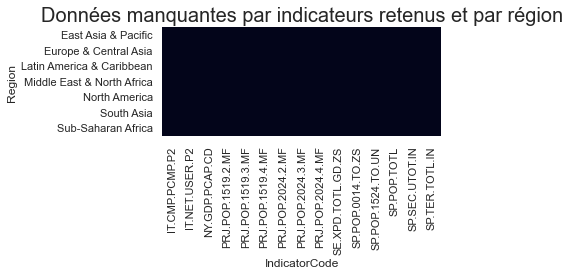

In [119]:
plt.figure(figsize=(5,2))
plt.title('Données manquantes par indicateurs retenus et par région', size = 20)
sns.heatmap(data_copy_long_indicateurs[['Region', 'IndicatorCode', 'Value']].pivot_table(
    index='Region',columns='IndicatorCode',values='Value', ).isnull(), cbar = False);
plt.savefig('img/indic_missing_region.png', bbox_inches='tight')

Les indicateurs sont renseignés pour toutes les régions.

#### Par pays <a class="anchor" id="by_country"></a>

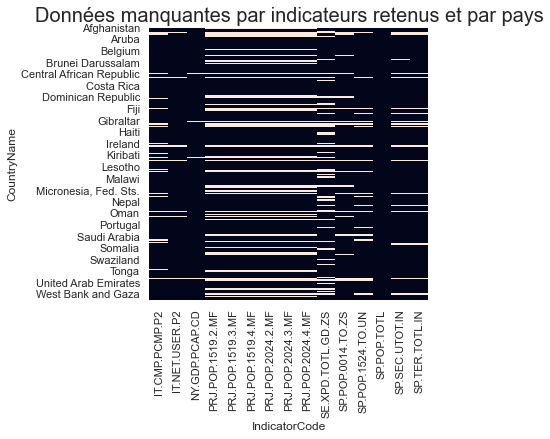

In [120]:
plt.figure(figsize=(5,5))
plt.title('Données manquantes par indicateurs retenus et par pays', size = 20)
sns.heatmap(data_copy_long_indicateurs[['CountryName', 'IndicatorCode', 'Value']].pivot_table(
    index='CountryName',columns='IndicatorCode',values='Value').isnull(), cbar = False);
plt.savefig('img/indic_missing_pays.png', bbox_inches='tight')

In [121]:
# Pourcentage du nombre de NaN par indicateur en fonction des pays
data_copy_long_indicateurs.groupby(['CountryCode','IndicatorCode'])[
    'IndicatorCode'].count().unstack(level = 0).isna().mean(axis = 1).sort_values(ascending = False)

IndicatorCode
SE.XPD.TOTL.GD.ZS    0.222749
PRJ.POP.1519.2.MF    0.213270
PRJ.POP.1519.3.MF    0.213270
PRJ.POP.1519.4.MF    0.213270
PRJ.POP.2024.2.MF    0.213270
PRJ.POP.2024.3.MF    0.213270
PRJ.POP.2024.4.MF    0.213270
IT.CMP.PCMP.P2       0.109005
SP.POP.1524.TO.UN    0.094787
SP.POP.0014.TO.ZS    0.090047
SP.SEC.UTOT.IN       0.085308
SP.TER.TOTL.IN       0.080569
IT.NET.USER.P2       0.033175
NY.GDP.PCAP.CD       0.018957
SP.POP.TOTL          0.000000
dtype: float64

- 22% des données par pays sur les dépenses du Gouvernement dans l'édcucation sont manquantes. Gardons les pour le moment
- 21% des indicateurs de projections par pays sont manquants. Gardons les pour le moment.

In [122]:
data_copy_long_indicateurs.groupby('CountryName')['Value'].count().sort_values().head(10)

CountryName
Turks and Caicos Islands     5
American Samoa               7
Northern Mariana Islands     7
Kosovo                       8
Gibraltar                    8
Isle of Man                  8
Cayman Islands               9
Channel Islands             10
Greenland                   12
Faroe Islands               12
Name: Value, dtype: int64

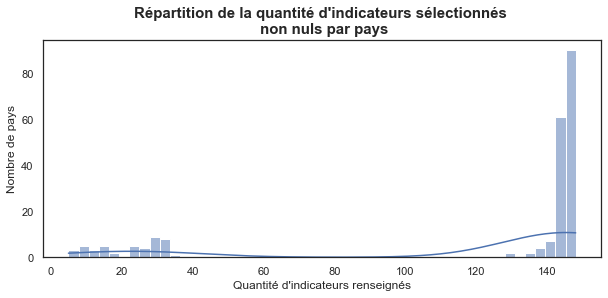

In [123]:
plt.figure(figsize=(10, 4))
sns.histplot(data_copy_long_indicateurs.groupby('CountryName')['Value'].count().sort_values(), bins = 50,
             kde = True)
plt.title("Répartition de la quantité d'indicateurs sélectionnés \n non nuls par pays", fontweight = 'bold', fontsize = 15)
plt.xlabel("Quantité d'indicateurs renseignés", fontsize = 12)
plt.ylabel('Nombre de pays', fontsize = 12);

On remarque que certains petits pays (notamment les iles) ont peu d'indicateurs toutes années confondues renseignés (moins de 40) et un grand nombre de pays a en revanche de nombreux indicateurs renseignés (aux alentours de 150).

#### Par année <a class="anchor" id="by_year"></a>

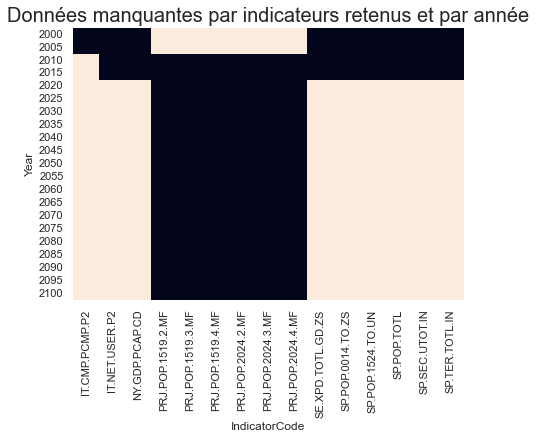

In [124]:
plt.figure(figsize=(7,5))
plt.title('Données manquantes par indicateurs retenus et par année', size = 20)
sns.heatmap(data_copy_long_indicateurs[['Year', 'IndicatorCode', 'Value']].pivot_table(
    index='Year',columns='IndicatorCode',values='Value').isnull(), cbar = False);
plt.savefig('img/indic_missing_annee.png', bbox_inches='tight')

- les indicateurs de projections sont remplis à partir de 2010
- les indicateurs sur l'usage d'internet et la possession d'ordinateurs sont remplis uniquement pour les années 2000 et 2005
- l'indicateur sur le PIB est rempli pour toutes les années (hors projections)
- les indicateurs démographiques sont remplis pour toutes les années (hors projections)
- les données sur les dépenses du gouvernement dans l'éducation sont remplies pour toutes les années (hors projections)

In [125]:
data_clean = data_copy_long_indicateurs

In [126]:
del data_copy_long
del code_footnote_differents
del code_footnote_identiques

## Pays ciblés et projections <a class="anchor" id="target"></a>

### Principales statistiques <a class="anchor" id="stats"></a>

Nous allons créer un nouvel indicateur nous permettant de connaitre la population entre 0 et 14 ans.

In [127]:
# Passage au format wide pour pouvoir créer le nouvel indicateur
data_clean_new_indicateur = data_clean.pivot_table(index = ['Region', 'CountryName', 'CountryCode', 'IncomeGroup', 'Year'], 
                       columns = 'IndicatorCode', values = 'Value')

In [128]:
# Création de SP.POP.0014.TO.UN qui représente la population entre 0 et 14 ans
data_clean_new_indicateur['SP.POP.0014.TO.UN'] = data_clean_new_indicateur[
    'SP.POP.0014.TO.ZS'] * data_clean_new_indicateur['SP.POP.TOTL'] / 100

In [129]:
data_clean_new_indicateur = data_clean_new_indicateur.reset_index()

In [130]:
# Suppression des indicateurs dont nous n'avons plus besoin
data_clean_new_indicateur = data_clean_new_indicateur.drop(['SP.POP.TOTL', 'SP.POP.0014.TO.ZS'], 
                                                           axis='columns', inplace = False)

In [131]:
# Passage au format long
data_clean_new_indicateur = pd.melt(data_clean_new_indicateur,id_vars=['Region','CountryName', 'CountryCode', 
                                                                       'IncomeGroup','Year'], 
                                    var_name='IndicatorCode', value_name='Value')

In [132]:
data_clean_new_indicateur.shape

(51324, 7)

In [133]:
# Liste des IndicatorNames
IndicatorNames = data_clean.groupby(['IndicatorCode', 'IndicatorName']).count().reset_index()

In [134]:
# Réintégration de la colonne IndicatorName (supprimée pour éviter le multi index)
data_clean_new_indicateur = data_clean_new_indicateur.merge(IndicatorNames[['IndicatorCode', 'IndicatorName']], 
                                                            how = 'left', on = 'IndicatorCode')

In [135]:
# Affectation d'un nom pour les nouveaux indicateurs crées
data_clean_new_indicateur.loc[data_clean_new_indicateur['IndicatorCode'] == 'SP.POP.0014.TO.UN', 
                              'IndicatorName'] = 'Population, ages 0-14, total'

In [136]:
data_clean_new_indicateur.head()

,Region,CountryName,CountryCode,IncomeGroup,Year,IndicatorCode,Value,IndicatorName
0,East Asia & Pacific,American Samoa,ASM,Upper middle income,2000,IT.CMP.PCMP.P2,NaN,Personal computers (per 100 people)
1,East Asia & Pacific,American Samoa,ASM,Upper middle income,2005,IT.CMP.PCMP.P2,NaN,Personal computers (per 100 people)
2,East Asia & Pacific,American Samoa,ASM,Upper middle income,2010,IT.CMP.PCMP.P2,NaN,Personal computers (per 100 people)
3,East Asia & Pacific,American Samoa,ASM,Upper middle income,2015,IT.CMP.PCMP.P2,NaN,Personal computers (per 100 people)
4,East Asia & Pacific,Australia,AUS,High income: OECD,2000,IT.CMP.PCMP.P2,46.730484,Personal computers (per 100 people)


In [137]:
# Suppression des lignes où la colonne Value est manquante

# Index des lignes de la colonne Value contenant des données manquantes
index_with_nan = data_clean_new_indicateur.index[data_clean_new_indicateur['Value'].isna()]

# Suppression des lignes contenant les données manquantes
data_clean_new_indicateur = data_clean_new_indicateur.drop(index_with_nan, axis = 0, inplace = False)

In [138]:
data_clean_new_indicateur.shape

(24227, 8)

In [139]:
# Calcul des statistiques par income group, pays et indicateur
pd.set_option('display.float_format', lambda x: '%.2f' % x) # force l'affichage à 2 chiffres après la virgule

stat_pays = data_clean_new_indicateur.groupby(['IncomeGroup','CountryName', 'IndicatorCode', 'IndicatorName']).agg([
    'mean', 'median', 'std','min', 'max'])['Value'].unstack(level = [2,3])
stat_pays.head(3)

mean  \
IndicatorCode                                      IT.CMP.PCMP.P2   
IndicatorName                 Personal computers (per 100 people)   
IncomeGroup       CountryName                                       
High income: OECD Australia                                 46.73   
                  Austria                                   48.40   
                  Belgium                                   30.01   

                                                               \
IndicatorCode                                  IT.NET.USER.P2   
IndicatorName                 Internet users (per 100 people)   
IncomeGroup       CountryName                                   
High income: OECD Australia                             67.58   
                  Austria                               62.71   
                  Belgium                               61.33   

                                                            \
IndicatorCode                               NY.GDP.PCAP.CD   
IndicatorName                 GDP per capita (current US$)   
IncomeGroup       CountryName                                
High income: OECD Australia                       41033.94   
                  Austria                         38520.30   
                  Belgium                         36232.56   

                                                                                                                                                             \
IndicatorCode                                                                                                                             PRJ.POP.1519.2.MF   
IndicatorName                 Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total   
IncomeGroup       CountryName                                                                                                                                 
High income: OECD Australia                                                                                                                          402.65   
                  Austria                                                                                                                            232.15   
                  Belgium                                                                                                                            336.53   

                                                                                                                                                             \
IndicatorCode                                                                                                                             PRJ.POP.1519.3.MF   
IndicatorName                 Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
IncomeGroup       CountryName                                                                                                                                 
High income: OECD Australia                                                                                                                         1386.75   
                  Austria                                                                                                                            101.15   
                  Belgium                                                                                                                            306.09   

                                                                                                                                                            \
IndicatorCode                                                                                                                            PRJ.POP.1519.4.MF   
IndicatorName                 Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Seco

In [140]:
# Affichage des différents index
print("Index 0: \n",stat_pays.columns.get_level_values(0).unique().tolist(),"\n")
print("Index 1: \n",stat_pays.columns.get_level_values(1).unique().tolist(),"\n")
print("Index 2: \n",stat_pays.columns.get_level_values(2).unique().tolist(),"\n")

Index 0: 
 ['mean', 'median', 'std', 'min', 'max'] 

Index 1: 
 ['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'PRJ.POP.1519.2.MF', 'PRJ.POP.1519.3.MF', 'PRJ.POP.1519.4.MF', 'PRJ.POP.2024.2.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF', 'SE.XPD.TOTL.GD.ZS', 'SP.POP.0014.TO.UN', 'SP.POP.1524.TO.UN', 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN'] 

Index 2: 
 ['Personal computers (per 100 people)', 'Internet users (per 100 people)', 'GDP per capita (current US$)', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total', 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Project

In [141]:
# Changement du l'ordre d'apparition des index 
stat_pays.columns = stat_pays.columns.swaplevel(0,2) # passage du level 0 (stat) au level 1
stat_pays.columns = stat_pays.columns.swaplevel(0,1) # puis du nouveau level 0 (stat) au nouveau level 1
stat_pays.sort_index(axis = 1, level=[0,1], ascending=[True, False], inplace = True) # classement alphabétique par indicateur
stat_pays.head(10)

IndicatorCode                                         IT.CMP.PCMP.P2         \
IndicatorName                    Personal computers (per 100 people)          
                                                                mean median   
IncomeGroup       CountryName                                                 
High income: OECD Australia                                    46.73  46.73   
                  Austria                                      48.40  48.40   
                  Belgium                                      30.01  30.01   
                  Canada                                       64.88  64.88   
                  Chile                                        11.63  11.63   
                  Czech Republic                               19.78  19.78   
                  Denmark                                      60.10  60.10   
                  Estonia                                      32.58  32.58   
                  Finland                                      44.82  44.82   
                  France                                       43.61  43.61   

IndicatorCode                                       \
IndicatorName                                        
                                   std   min   max   
IncomeGroup       CountryName                        
High income: OECD Australia        NaN 46.73 46.73   
                  Austria        17.31 36.16 60.64   
                  Belgium        10.77 22.40 37.63   
                  Canada         32.32 42.02 87.73   
                  Chile           3.46  9.19 14.08   
                  Czech Republic 10.73 12.19 27.37   
                  Denmark        13.47 50.58 69.62   
                  Estonia        23.30 16.10 49.05   
                  Finland         7.38 39.60 50.03   
                  France         18.88 30.26 56.96   

IndicatorCode                                     IT.NET.USER.P2               \
IndicatorName                    Internet users (per 100 people)                
                                                            mean median   std   
IncomeGroup       CountryName                                                   
High income: OECD Australia                                67.58  69.50 16.47   
                  Austria                                  62.71  66.59 22.12   
                  Belgium                                  61.33  65.41 24.48   
                  Canada                                   72.93  75.98 15.97   
                  Chile                                    39.27  38.09 20.32   
                  Czech Republic                           47.38  52.05 30.66   
                  Denmark                                  76.74  85.73 25.66   
                  Estonia                                  63.13  67.78 25.54   
                  Finland                                  71.26  80.45 23.39   
                  France                                   54.79  60.08 32.56   

IndicatorCode                                              NY.GDP.PCAP.CD  \
IndicatorName                                GDP per capita (current US$)   
                                   min   max                         mean   
IncomeGroup       CountryName                                               
High income: OECD Australia      46.76 84.56                     41033.94   
                  Austria        33.73 83.94                     38520.30   
                  Belgium        29.43 85.05                     36232.56   
                  Canada         51.30 88.47                     37769.23   
                  Chile          16.60 64.29                      9807.52   
                  Czech Republic  9.78 75.67                     14220.37   
                  Denmark        39.17 96.33                     47649.45   
                  Estonia        28.58 88.41                     11550.71   
                  Finland        37.25 86.89                     37961.10   


In [142]:
# Calcul des statistiques par income group et indicateur
stat_income = data_clean_new_indicateur.groupby(['IncomeGroup', 'IndicatorCode', 'IndicatorName']).agg([
    'mean', 'median', 'std','min', 'max'])['Value'].unstack(level = [1,2])
stat_income

mean  \
IndicatorCode                             IT.CMP.PCMP.P2   
IndicatorName        Personal computers (per 100 people)   
IncomeGroup                                                
High income: OECD                                  41.23   
High income: nonOECD                               20.12   
Low income                                          0.69   
Lower middle income                                 2.65   
Upper middle income                                 7.19   

                                                      \
IndicatorCode                         IT.NET.USER.P2   
IndicatorName        Internet users (per 100 people)   
IncomeGroup                                            
High income: OECD                              61.07   
High income: nonOECD                           46.06   
Low income                                      3.96   
Lower middle income                            13.04   
Upper middle income                            25.07   

                                                   \
IndicatorCode                      NY.GDP.PCAP.CD   
IndicatorName        GDP per capita (current US$)   
IncomeGroup                                         
High income: OECD                        34316.61   
High income: nonOECD                     31040.84   
Low income                                 481.34   
Lower middle income                       1673.41   
Upper middle income                       5431.91   

                                                                                                                                                    \
IndicatorCode                                                                                                                    PRJ.POP.1519.2.MF   
IndicatorName        Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total   
IncomeGroup                                                                                                                                          
High income: OECD                                                                                                                          1028.52   
High income: nonOECD                                                                                                                        271.88   
Low income                                                                                                                                 1225.19   
Lower middle income                                                                                                                        1970.36   
Upper middle income                                                                                                                        1116.72   

                                                                                                                                                    \
IndicatorCode                                                                                                                    PRJ.POP.1519.3.MF   
IndicatorName        Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
IncomeGroup                                                                                                                                          
High income: OECD                                                                                                                           760.71   
High income: nonOECD                                                                                                                        281.68   
Low income                                                                                                                                  387.63   
Lower middle income                                                                                                            

In [143]:
# Affichage des différents index
print("Index 0: \n",stat_income.columns.get_level_values(0).unique().tolist(),"\n")
print("Index 1: \n",stat_income.columns.get_level_values(1).unique().tolist(),"\n")
print("Index 2: \n",stat_income.columns.get_level_values(2).unique().tolist(),"\n")

Index 0: 
 ['mean', 'median', 'std', 'min', 'max'] 

Index 1: 
 ['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'PRJ.POP.1519.2.MF', 'PRJ.POP.1519.3.MF', 'PRJ.POP.1519.4.MF', 'PRJ.POP.2024.2.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF', 'SE.XPD.TOTL.GD.ZS', 'SP.POP.0014.TO.UN', 'SP.POP.1524.TO.UN', 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN'] 

Index 2: 
 ['Personal computers (per 100 people)', 'Internet users (per 100 people)', 'GDP per capita (current US$)', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total', 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Project

In [144]:
# Changement du l'ordre d'apparition des index 
stat_income.columns = stat_income.columns.swaplevel(0,2) # passage du level 0 (stat) au level 1
stat_income.columns = stat_income.columns.swaplevel(0,1) # puis du nouveau level 0 (stat) au nouveau level 1
stat_income.sort_index(axis = 1, level=[0,1], ascending=[True, False], inplace = True) # classement alphabétique par indicateur
stat_income

IndicatorCode                             IT.CMP.PCMP.P2                    \
IndicatorName        Personal computers (per 100 people)                     
                                                    mean median   std  min   
IncomeGroup                                                                  
High income: OECD                                  41.23  39.66 21.56 6.83   
High income: nonOECD                               20.12  13.87 19.45 0.39   
Low income                                          0.69   0.33  1.03 0.02   
Lower middle income                                 2.65   1.69  2.64 0.20   
Upper middle income                                 7.19   5.57  5.40 0.11   

IndicatorCode                               IT.NET.USER.P2                    \
IndicatorName              Internet users (per 100 people)                     
                       max                            mean median   std  min   
IncomeGroup                                                                    
High income: OECD    87.73                           61.07  68.00 25.10 7.29   
High income: nonOECD 81.91                           46.06  46.40 27.39 0.13   
Low income            6.69                            3.96   1.24  5.56 0.00   
Lower middle income  13.46                           13.04   7.25 14.49 0.03   
Upper middle income  23.15                           25.07  19.97 21.43 0.11   

IndicatorCode                            NY.GDP.PCAP.CD                    \
IndicatorName              GDP per capita (current US$)                     
                       max                         mean   median      std   
IncomeGroup                                                                 
High income: OECD    98.20                     34316.61 33854.03 19473.03   
High income: nonOECD 98.32                     31040.84 21959.32 27995.24   
Low income           22.74                       481.34   432.19   249.28   
Lower middle income  63.31                      1673.41  1377.08   997.08   
Upper middle income  77.00                      5431.91  4842.07  3025.83   

IndicatorCode                           \
IndicatorName                            
                         min       max   
IncomeGroup                              
High income: OECD    4070.03 104965.31   
High income: nonOECD 1702.68 168146.02   
Low income            123.88   1349.97   
Lower middle income   263.11   4160.27   
Upper middle income   555.30  15390.04   

IndicatorCode                                                                                                                    PRJ.POP.1519.2.MF  \
IndicatorName        Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total   
                                                                                                                                              mean   
IncomeGroup                                                                                                                                          
High income: OECD                                                                                                                          1028.52   
High income: nonOECD                                                                                                                        271.88   
Low income                                                                                                                                 1225.19   
Lower middle income                                                                                                                        1970.36   
Upper middle income                                                                                                                        1116.72   

IndicatorCode                                      \
IndicatorName                                       
                     median     std  min      

###  Pays à fort potentiel de clients <a class="anchor" id="pays_potentiel"></a>

Les pays à fort potentiel de clients sont les pays, qui, à la date la plus récente (2015), ont la population en âge de faire des études secondaires et tertiaires tout en ayant accès à internet et à un ordinateur personnel la plus importante. Des données économiques telles que le PIB ou encore les dépenses du gouvernement pour l'éducation viendront compléter notre choix.

####  Population en âge de faire des études secondaires et tertiaires <a class="anchor" id="pop_sec_ter"></a>

In [145]:
# Population en âge de faire des études secondaires par pays sur l'année 2015
classement_pays_sec = data_clean_new_indicateur[(data_clean_new_indicateur.Year == '2015') & 
                          (data_clean_new_indicateur.IndicatorCode == 'SP.SEC.UTOT.IN')].groupby(
    ['CountryName']).sum().sort_values(by='Value',ascending=False).reset_index()

In [146]:
# Population en âge de faire des études tertiaires par pays sur l'année 2015
classement_pays_ter = data_clean_new_indicateur[(data_clean_new_indicateur.Year == '2015') & 
                          (data_clean_new_indicateur.IndicatorCode == 'SP.TER.TOTL.IN')].groupby(
    ['CountryName']).sum().sort_values(by='Value',ascending=False).reset_index()

In [147]:
# Full merge pour vérifier que les 2 indicateurs sont remplis
classement_pays_sec_ter = classement_pays_sec.merge(classement_pays_ter[['CountryName', 'Value']], on = 'CountryName', 
                                                    how = 'outer')

In [148]:
# Liste des pays sans données
classement_pays_sec_ter[classement_pays_sec_ter.isnull().any(axis = 1)].head()

,CountryName,Value_x,Value_y
4,Bangladesh,13048209.00,NaN
6,Nigeria,11326234.00,NaN
9,"Congo, Dem. Rep.",6692036.00,NaN
12,Ethiopia,4499928.00,NaN
16,Japan,3591159.00,NaN


Nous ne pouvons pas prendre l'année 2015 directement comme référence car il peut y avoir des valeurs manquantes à cette date. Nous allons donc récupérer la valeur la plus récente non nulle pour toutes les variables par pays. Pour cela, nous allons utiliser la fonction fillna de pandas avec la méthode ffill qui remplace la donnée manquante par celle de la ligne précédente qui contient une valeur. Nous enlevons les indicateurs de projections. Nous pourrons donc ensuite sélectionner l'année 2015 qui, si donnée manquante, aura été complétée par la dernière valeur non nulle d'une année précédente.

In [149]:
# Passage des pays et des indicateurs en colonne (multi index), hors indicateurs de projection
data_clean_2015 = data_clean_new_indicateur[~data_clean_new_indicateur.IndicatorCode.str.startswith('PRJ')].pivot_table(index='Year',columns=['CountryName', 'IndicatorCode'],values='Value')
data_clean_2015

CountryName      Afghanistan                                                  \
IndicatorCode IT.CMP.PCMP.P2 IT.NET.USER.P2 NY.GDP.PCAP.CD SE.XPD.TOTL.GD.ZS   
Year                                                                           
2000                     NaN            NaN            NaN               NaN   
2005                    0.34           1.22         250.29               NaN   
2010                     NaN           4.00         553.30              3.46   
2015                     NaN           8.26         569.58              3.32   

CountryName                                                       \
IndicatorCode SP.POP.0014.TO.UN SP.POP.1524.TO.UN SP.SEC.UTOT.IN   
Year                                                               
2000                 9759454.00        3979438.00     1245988.00   
2005                11924203.00        4910340.00     1570386.00   
2010                13767370.00        6090239.00     1765556.00   
2015                15023530.00        7252785.00     2305137.00   

CountryName                         Albania                                \
IndicatorCode SP.TER.TOTL.IN IT.CMP.PCMP.P2 IT.NET.USER.P2 NY.GDP.PCAP.CD   
Year                                                                        
2000              1760125.00           0.76           0.11        1175.79   
2005              2304393.00           1.69           6.04        2709.14   
2010              2490352.00            NaN          45.00        4094.36   
2015              3199607.00            NaN          63.25        3934.90   

CountryName                                                          \
IndicatorCode SE.XPD.TOTL.GD.ZS SP.POP.0014.TO.UN SP.POP.1524.TO.UN   
Year                                                                  
2000                       3.29         934839.38         538251.00   
2005                       3.24         797072.46         586049.00   
2010                        NaN         654460.75         608456.00   
2015                        NaN         519300.72         556269.00   

CountryName                                        Algeria                 \
IndicatorCode SP.SEC.UTOT.IN SP.TER.TOTL.IN IT.CMP.PCMP.P2 IT.NET.USER.P2   
Year                                                                        
2000               240167.00      257150.00           0.63           0.49   
2005               265994.00      271360.00           1.03           5.84   
2010               178188.00      274639.00            NaN          12.50   
2015               156541.00      276247.00            NaN          38.20   

CountryName                                                       \
IndicatorCode NY.GDP.PCAP.CD SP.POP.0014.TO.UN SP.POP.1524.TO.UN   
Year                                                               
2000                 1757.02       10687382.00        6901569.00   
2005                 3100.12        9681087.00        7409807.00   
2010                 4463.39        9827771.00        7245764.00   
2015                 4160.22       11424395.00        6467818.00   

CountryName                                 American Samoa        Andorra  \
IndicatorCode SP.SEC.UTOT.IN SP.TER.TOTL.IN NY.GDP.PCAP.CD IT.NET.USER.P2   
Year                                                                        
2000              2276884.00     3437146.00            NaN          10.54   
2005              2343724.00     3815342.00        8508.41          37.61   
2010              2197269.00     3835387.00       10352.82          81.00   
2015              1796069.00     3492401.00       11865.96          96.91   

CountryName                                                       \
IndicatorCode NY.GDP.PCAP.CD SE.XPD.TOTL.GD.ZS SP.POP.1524.TO.UN   
Year                                                               
2000                21936.53               NaN           7446.00   
2005                41282.02              1.60           8464.00   
2010                39736.3

In [150]:
# On applique la méthode ffill pour compléter les données par pays en fonction de la dernière ligne remplie
data_clean_2015 = data_clean_2015.fillna(method = 'ffill').stack(level = [0,1]).reset_index()

In [151]:
# On renomme la colonne Value et on filtre sur 2015
data_clean_2015.rename(columns={0: 'Value'}, inplace = True)
data_clean_2015 = data_clean_2015[data_clean_2015.Year == '2015']

In [152]:
# On filtre sur SP.SEC.UTOT.IN, on renomme la variable et on classe en décroissant
classement_pays_sec = data_clean_2015[data_clean_2015.IndicatorCode == 'SP.SEC.UTOT.IN'][['CountryName', 'Value']]
classement_pays_sec.rename(columns={'Value': 'Students_Sec'}, inplace = True)
classement_pays_sec = classement_pays_sec.sort_values(by = 'Students_Sec', ascending = False).reset_index(drop = True)

In [153]:
classement_pays_sec.head()

,CountryName,Students_Sec
0,India,99198160.00
1,China,46531520.00
2,Pakistan,15504304.00
3,Indonesia,13619948.00
4,Bangladesh,13048209.00


Procédons de la même manière pour la population en âge de faire des études tertiaires.

In [154]:
# On filtre sur SP.TER.TOTL.IN, on renomme la variable et on classe en décroissant
classement_pays_ter = data_clean_2015[data_clean_2015.IndicatorCode == 'SP.TER.TOTL.IN'][['CountryName', 'Value']]
classement_pays_ter.rename(columns={'Value': 'Students_Ter'}, inplace = True)
classement_pays_ter = classement_pays_ter.sort_values(by = 'Students_Ter', ascending = False).reset_index(drop = True)

In [155]:
classement_pays_ter.head()

,CountryName,Students_Ter
0,India,119469984.00
1,China,99943816.00
2,United States,22765372.00
3,Indonesia,21059620.00
4,Pakistan,18852632.00


In [156]:
# Full merge pour vérifier que les 2 indicateurs sont remplis
classement_pays_2015 = classement_pays_sec.merge(classement_pays_ter, on = 'CountryName', how = 'outer')

In [157]:
# Suppression du pays sans donnée sur une des variables (Bosnie Herzégovine)
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [158]:
# Somme pour avoir la population totale en âge de faire des études secondaires et supérieures
classement_pays_2015['Students'] = classement_pays_2015['Students_Sec'] + classement_pays_2015['Students_Ter']

In [159]:
classement_pays_2015 = classement_pays_2015.sort_values(by = 'Students', ascending = False).reset_index(drop = True)

In [160]:
classement_pays_2015.head()

,CountryName,Students_Sec,Students_Ter,Students
0,India,99198160.00,119469984.00,218668144.00
1,China,46531520.00,99943816.00,146475336.00
2,United States,12321350.00,22765372.00,35086722.00
3,Indonesia,13619948.00,21059620.00,34679568.00
4,Pakistan,15504304.00,18852632.00,34356936.00


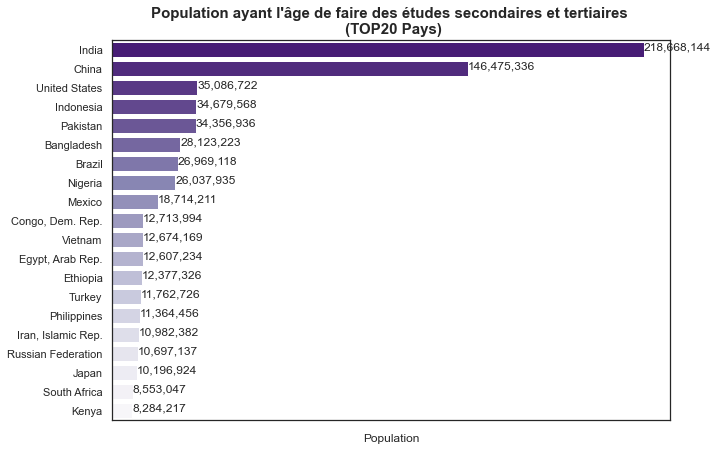

In [161]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y = 'CountryName', x='Students', data = classement_pays_2015.head(20), palette='Purples_r')
plt.title("Population ayant l'âge de faire des études secondaires et tertiaires \n (TOP20 Pays)", 
          fontweight='bold', fontsize = 15)# titre du plot
plt.xlabel("Population", fontsize = 12) # label axe des abscisses
plt.ylabel("", fontsize = 12)
ax.set_xticklabels([]) # supprime le label de l'axe x

# Pour afficher les étiquettes
total = len(classement_pays_2015['CountryName'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/pop_sec_ter.png', bbox_inches='tight')

Appliquons ensuite le pourcentage d'utilisateurs d'internet pour connaitre le potentiel de clients.

####  Prospects internet <a class="anchor" id="prosp_internet"></a>

In [162]:
# On filtre sur IT.NET.USER.P2, on renomme la variable et on classe en décroissant
classement_pays_internet = data_clean_2015[data_clean_2015.IndicatorCode == 'IT.NET.USER.P2'][['CountryName', 'Value']]
classement_pays_internet.rename(columns={'Value': '%_Internet'}, inplace = True)
classement_pays_internet = classement_pays_internet.sort_values(by = '%_Internet', ascending = False).reset_index(drop = True)

In [163]:
classement_pays_internet.head()

,CountryName,%_Internet
0,Bermuda,98.32
1,Iceland,98.20
2,Luxembourg,97.33
3,Andorra,96.91
4,Norway,96.81


In [164]:
# Outer join pour vérifier que les indicateurs sont remplis
classement_pays_2015 = classement_pays_2015.merge(classement_pays_internet, on = 'CountryName', how = 'outer')

In [165]:
# Suppression des pays où il manque des données
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [166]:
classement_pays_2015.head()

,CountryName,Students_Sec,Students_Ter,Students,%_Internet
0,India,99198160.00,119469984.00,218668144.00,26.00
1,China,46531520.00,99943816.00,146475336.00,50.30
2,United States,12321350.00,22765372.00,35086722.00,74.55
3,Indonesia,13619948.00,21059620.00,34679568.00,21.98
4,Pakistan,15504304.00,18852632.00,34356936.00,14.00


In [167]:
# Création colonne Prospects
classement_pays_2015['Prospects_Internet'] = (classement_pays_2015['Students'] * 
                                         classement_pays_2015['%_Internet']) / 100

In [168]:
classement_pays_2015 = classement_pays_2015.sort_values(by = 'Prospects_Internet', ascending=False).reset_index(
    drop = True)

classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20
9,Nigeria,11326234.00,14711701.00,26037935.00,24.50,6379294.08


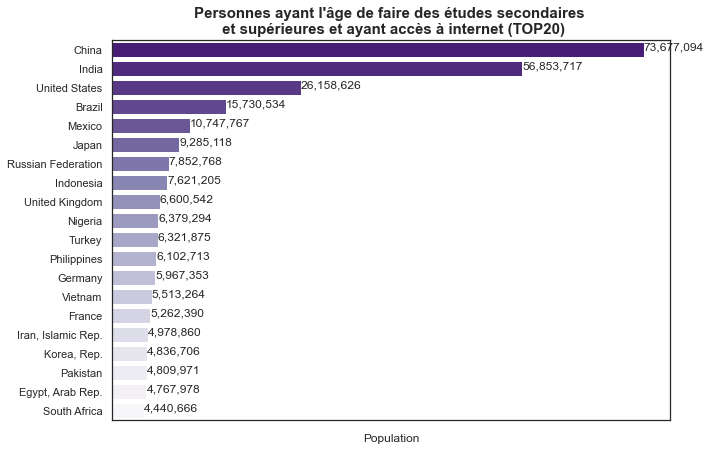

In [169]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y = 'CountryName', x='Prospects_Internet', data = classement_pays_2015.head(20), palette='Purples_r')
plt.title("Personnes ayant l'âge de faire des études secondaires \n et supérieures et ayant accès à internet (TOP20)", 
          fontweight='bold', fontsize = 15)
plt.xlabel("Population", fontsize = 12)
plt.ylabel("", fontsize = 12)
ax.set_xticklabels([]) # supprime le label de l'axe x

total = len(classement_pays_2015['CountryName'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/students_internet.png', bbox_inches='tight')

####  Prospects ordinateur personnel <a class="anchor" id="prosp_ordi"></a>

In [170]:
# On filtre sur IT.CMP.PCMP.P2, on renomme la variable et on classe en décroissant
classement_pays_ordinateur = data_clean_2015[data_clean_2015.IndicatorCode == 'IT.CMP.PCMP.P2'][['CountryName', 'Value']]
classement_pays_ordinateur.rename(columns={'Value': '%_Ordinateur'}, inplace = True)
classement_pays_ordinateur = classement_pays_ordinateur.sort_values(by = '%_Ordinateur', ascending = False).reset_index(drop = True)

In [171]:
classement_pays_ordinateur.head()

,CountryName,%_Ordinateur
0,Canada,87.73
1,Switzerland,86.79
2,Netherlands,85.53
3,Sweden,83.59
4,San Marino,81.91


In [172]:
# Outer join pour vérifier que les indicateurs sont remplis
classement_pays_2015 = classement_pays_2015.merge(classement_pays_ordinateur, on = 'CountryName', how = 'outer')

In [173]:
classement_pays_2015[classement_pays_2015.isnull().any(axis = 1)]

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur
44,Kazakhstan,454909.00,1430092.00,1885001.00,72.90,1374165.73,NaN
50,Iraq,2293444.00,3398202.00,5691646.00,17.22,980101.44,NaN
51,Dominican Republic,785986.00,957976.00,1743962.00,54.22,945502.36,NaN
87,Serbia,287940.00,413559.00,701499.00,65.32,458198.28,NaN
140,Sierra Leone,567690.00,556054.00,1123744.00,6.34,71295.06,NaN
146,Montenegro,34314.00,42978.00,77292.00,68.12,52650.99,NaN
155,Timor-Leste,79023.00,102222.00,181245.00,23.00,41686.35,NaN
158,Liberia,287363.00,359936.00,647299.00,5.90,38215.68,NaN
186,Liechtenstein,1289.00,2236.00,3525.00,96.64,3406.60,NaN
191,"Korea, Dem. People’s Rep.",1161259.00,2014830.00,3176089.00,0.00,0.00,NaN


In [174]:
# Suppression des pays où il manque des données
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [175]:
classement_pays_2015.head()

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64


In [176]:
# Création colonne Prospects
classement_pays_2015['Prospects_Ordinateurs'] = (classement_pays_2015['Students'] * 
                                                    classement_pays_2015['%_Ordinateur']) / 100

classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95,31.82,3244465.80
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27,12.09,1293172.71
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35,1.46,507492.53
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20,75.73,5433270.09
9,Nigeria,11326234.00,14711701.00,26037935.00,24.50,6379294.08,0.86,223844.41


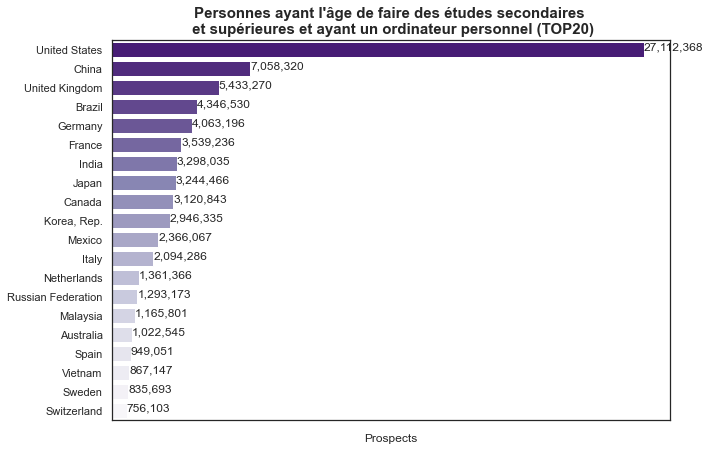

In [177]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y = 'CountryName', x='Prospects_Ordinateurs', data = classement_pays_2015.sort_values(
    by = 'Prospects_Ordinateurs', ascending = False).head(20), palette='Purples_r')
plt.title("Personnes ayant l'âge de faire des études secondaires \n et supérieures et ayant un ordinateur personnel (TOP20)", 
          fontweight='bold', fontsize = 15)
plt.xlabel("Prospects", fontsize = 12)
plt.ylabel("", fontsize = 12)
ax.set_xticklabels([]) # supprime le label de l'axe x

total = len(classement_pays_2015['CountryName'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/students_ordinateurs.png', bbox_inches='tight')

####  Prospects internet en fonction des prospects ayant un ordinateur personnel <a class="anchor" id="prosp_ordi_internet"></a>

Visualisons maintenant le nombre de personnes en âge de faire des études secondaires et supérieures et ayant un accès à internet en fonction de ceux possédant un ordinateur portable.

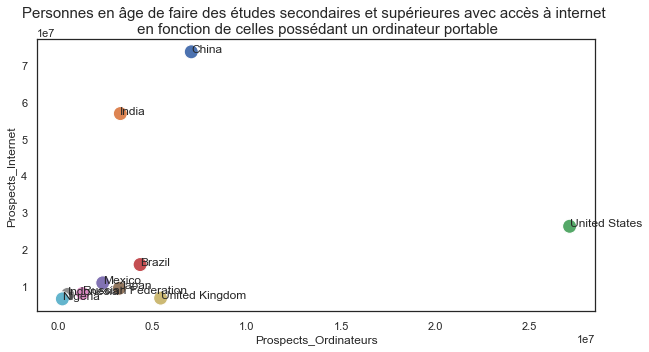

In [178]:
plt.figure(figsize=(10,5))
plt.title("Personnes en âge de faire des études secondaires et supérieures avec accès à internet \n en fonction de celles possédant un ordinateur portable", 
          size=15)

ax = sns.scatterplot(data = classement_pays_2015.head(10), x = "Prospects_Ordinateurs", y = "Prospects_Internet", 
            s=200, hue = 'CountryName') # taille des marqueurs
ax.grid(False)

plt.gca().legend().set_visible(False) # non affichage de la légende
#plt.legend(loc = 'lower right')

annotations = classement_pays_2015["CountryName"].head(10).tolist()

for i, label in enumerate(annotations):
    plt.annotate(label, (classement_pays_2015['Prospects_Ordinateurs'][i], 
                         classement_pays_2015['Prospects_Internet'][i]))
plt.savefig('img/students_internet_ordinateurs.png', bbox_inches='tight')

On remarque que les Etats Unis, l'Inde et la Chine sont les pays combinant le plus de clients potentiels: âge de faire des études secondaires ou supérieures, accès à internet et possédant un ordinateur personnel. Regardons plus en détail le coin inférieur gauche de ce graphique:

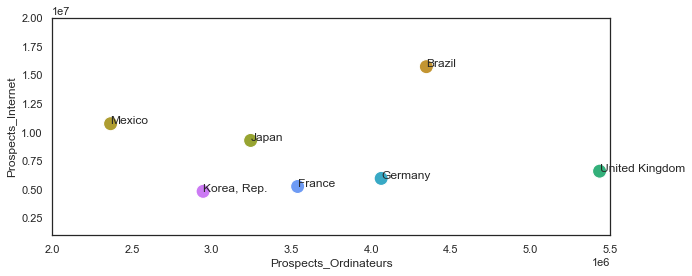

In [179]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(data = classement_pays_2015.head(20), x="Prospects_Ordinateurs", y="Prospects_Internet", 
            s=200, hue = 'CountryName') # taille des marqueurs
ax.grid(False)

plt.gca().legend().set_visible(False) # non affichage de la légende
# plt.legend(loc = 'lower right')

plt.xlim([2000000, 5500000])
plt.ylim([1000000, 20000000])

annotations = classement_pays_2015["CountryName"].head(20).tolist()

for i, label in enumerate(annotations):
    plt.annotate(label, (classement_pays_2015['Prospects_Ordinateurs'][i], 
                         classement_pays_2015['Prospects_Internet'][i]))

plt.savefig('img/students_internet_ordinateurs2.png', bbox_inches='tight')

- le Brésil, le Royaume Uni, le Mexique, le Japon, l'Allemagne, la France et la Corée sont des pays qui constituent un bon vivier de clients potentiels: utilisation d'internet et possèdent un ordinateur personnel

####  GDP <a class="anchor" id="GDP"></a>

In [180]:
# On filtre sur NY.GDP.PCAP.CD, on renomme la variable et on classe en décroissant
classement_pays_GDP = data_clean_2015[data_clean_2015.IndicatorCode == 'NY.GDP.PCAP.CD'][['CountryName', 'Value']]
classement_pays_GDP.rename(columns={'Value': 'GDP_per_capita'}, inplace = True)
classement_pays_GDP = classement_pays_GDP.sort_values(by = 'GDP_per_capita', ascending = False).reset_index(drop = True)

In [181]:
classement_pays_GDP.head()

,CountryName,GDP_per_capita
0,Liechtenstein,168146.02
1,Monaco,144246.37
2,Luxembourg,101446.79
3,Bermuda,88207.33
4,Switzerland,82016.02


In [182]:
# Outer join pour vérifier que les indicateurs sont remplis
classement_pays_2015 = classement_pays_2015.merge(classement_pays_GDP, on = 'CountryName', how = 'outer')

In [183]:
# Suppression des pays où il manque des données
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [184]:
classement_pays_2015.head()

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56,8069.21
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62,1596.47
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78,56469.01
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01,8757.21
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31,9152.87


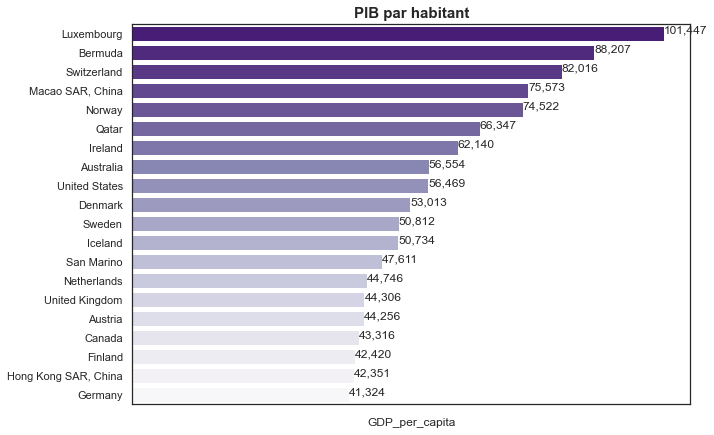

In [185]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y = 'CountryName', x='GDP_per_capita', data = classement_pays_2015.sort_values(
    by = 'GDP_per_capita', ascending = False).head(20), palette='Purples_r')
plt.title("PIB par habitant", 
          fontweight='bold', fontsize = 15)
plt.xlabel("GDP_per_capita", fontsize = 12)
plt.ylabel("", fontsize = 12)
ax.set_xticklabels([]) # supprime le label de l'axe x

total = len(classement_pays_2015['CountryName'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/pib.png', bbox_inches='tight')

####  Dépenses du gouvernement dans l'éducation <a class="anchor" id="gouv"></a>

In [186]:
# On filtre sur SE.XPD.TOTL.GD.ZS, on renomme la variable et on classe en décroissant
classement_pays_expenditures = data_clean_2015[data_clean_2015.IndicatorCode == 'SE.XPD.TOTL.GD.ZS'][['CountryName', 'Value']]
classement_pays_expenditures.rename(columns={'Value': 'Gov_expenditures_%_GDP'}, inplace = True)
classement_pays_expenditures = classement_pays_expenditures.sort_values(by = 'Gov_expenditures_%_GDP', ascending = False).reset_index(drop = True)

In [187]:
classement_pays_expenditures.head()

,CountryName,Gov_expenditures_%_GDP
0,Cuba,12.84
1,"Micronesia, Fed. Sts.",12.47
2,Lesotho,12.08
3,Kiribati,11.19
4,Botswana,10.68


In [188]:
# Outer join pour vérifier que les indicateurs sont remplis
classement_pays_2015 = classement_pays_2015.merge(classement_pays_expenditures, on = 'CountryName', how = 'outer')

In [189]:
classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita,Gov_expenditures_%_GDP
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56,8069.21,NaN
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62,1596.47,3.42
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78,56469.01,5.43
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01,8757.21,5.64
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31,9152.87,5.18
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95,31.82,3244465.80,34474.14,3.64
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27,12.09,1293172.71,9329.30,3.77
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35,1.46,507492.53,3336.11,3.59
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20,75.73,5433270.09,44305.55,5.68
9,Nigeria,11326234.00,14711701.00,26037935.00,24.50,6379294.08,0.86,223844.41,2655.16,NaN


Je n'ai trouvé aucun indicateur récent concernant les dépenses du gouvernement Chinois pour l'éducation. Afin de ne pas laisser de valeurs manquantes j'ai décidé de compléter les données par celles retrouvées sur le site de la Banque Mondiale (année 2015): il s'agit du pourcentage du GDP (= 3.825)
https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?locations=CN

Le Nigéria n'a aucune donnée connue depuis 1975. Je ne complète donc pas la valeur manquante.

In [190]:
classement_pays_2015.loc[classement_pays_2015.CountryName == 'China', 'Gov_expenditures_%_GDP'] = 3.825

In [191]:
# Suppression des pays où il manque des données
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [192]:
classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita,Gov_expenditures_%_GDP
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56,8069.21,3.83
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62,1596.47,3.42
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78,56469.01,5.43
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01,8757.21,5.64
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31,9152.87,5.18
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95,31.82,3244465.80,34474.14,3.64
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27,12.09,1293172.71,9329.30,3.77
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35,1.46,507492.53,3336.11,3.59
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20,75.73,5433270.09,44305.55,5.68
10,Turkey,5362706.00,6400020.00,11762726.00,53.74,6321874.63,6.01,707225.04,10984.77,2.58


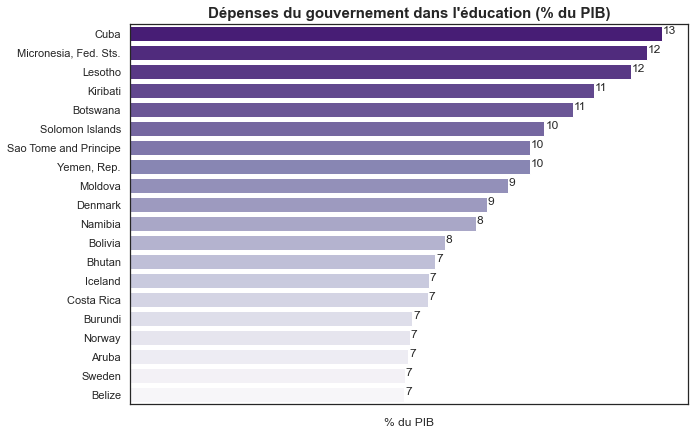

In [193]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y = 'CountryName', x='Gov_expenditures_%_GDP', data = classement_pays_2015.sort_values(
    by = 'Gov_expenditures_%_GDP', ascending = False).head(20), palette='Purples_r')
plt.title("Dépenses du gouvernement dans l'éducation (% du PIB)", 
          fontweight='bold', fontsize = 15)
plt.xlabel("% du PIB", fontsize = 12)
plt.ylabel("", fontsize = 12)
ax.set_xticklabels([]) # supprime le label de l'axe x

total = len(classement_pays_2015['CountryName'])
for p in ax.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(etiquette,(x,y))
plt.savefig('img/expenditures.png', bbox_inches='tight')

####  Population 15-24 ans en 2040 par plus haut degré d'éducation (secondaire et post secondaire) <a class="anchor" id="15-24"></a>

Tous les indicateurs sont bien renseignés. Nous pouvons donc faire leur somme qui représentera la population 15-24 ans avec au minimum un niveau d'éducation secondaire. A noter que l'indicateur PRJ.POP.1519.4.MF a la valeur 0 pour certains pays. Nous prenons comme hypothèse que la population est comptabilisée dans un des autres indicateurs disponibles.

In [194]:
# Vérification que tous les indicateurs sont remplis par pays sur l'année 2040
data_2040_PRJ = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode.str.startswith('PRJ')) & 
                          (data_clean_new_indicateur.Year == '2040')].pivot_table(
    index='CountryName',columns='IndicatorCode',values='Value', margins = True, aggfunc = np.sum, 
    margins_name = 'PRJ.POP.1524').reset_index()

data_2040_PRJ.sort_values(by = 'PRJ.POP.1524', ascending = False).head()
#data_2040_PRJ[data_2040_PRJ.isnull().any(axis = 1)]

IndicatorCode,CountryName,PRJ.POP.1519.2.MF,PRJ.POP.1519.3.MF,PRJ.POP.1519.4.MF,PRJ.POP.2024.2.MF,PRJ.POP.2024.3.MF,PRJ.POP.2024.4.MF,PRJ.POP.1524
166,PRJ.POP.1524,217595.10,208253.29,12628.78,93854.21,273801.09,113527.23,919659.70
66,India,31494.63,66507.51,673.78,12778.60,64161.82,22796.81,198413.15
29,China,17092.24,36752.68,4737.50,18281.47,21984.21,22836.48,121684.58
111,Nigeria,14449.55,7176.72,143.83,4462.10,16810.02,4043.21,47085.43
158,United States,13073.72,8261.12,132.86,946.84,15763.14,5656.09,43833.77


In [195]:
# On remarque que la somme par colonne s'est rajoutée. On la supprime
data_2040_PRJ.drop(data_2040_PRJ[data_2040_PRJ['CountryName'] == 'PRJ.POP.1524'].index, axis=0, inplace = True)

In [196]:
data_2040_PRJ = data_2040_PRJ.sort_values(by = 'PRJ.POP.1524', ascending = False)
data_2040_PRJ.head()

IndicatorCode,CountryName,PRJ.POP.1519.2.MF,PRJ.POP.1519.3.MF,PRJ.POP.1519.4.MF,PRJ.POP.2024.2.MF,PRJ.POP.2024.3.MF,PRJ.POP.2024.4.MF,PRJ.POP.1524
66,India,31494.63,66507.51,673.78,12778.60,64161.82,22796.81,198413.15
29,China,17092.24,36752.68,4737.50,18281.47,21984.21,22836.48,121684.58
111,Nigeria,14449.55,7176.72,143.83,4462.10,16810.02,4043.21,47085.43
158,United States,13073.72,8261.12,132.86,946.84,15763.14,5656.09,43833.77
67,Indonesia,10845.80,5610.98,0.00,1183.46,13479.62,2367.72,33487.58


In [197]:
# Outer join pour vérifier que les indicateurs sont remplis
classement_pays_2015 = classement_pays_2015.merge(data_2040_PRJ[['CountryName', 'PRJ.POP.1524']], on = 'CountryName', how = 'outer')

In [198]:
classement_pays_2015.rename(columns={'PRJ.POP.1524': 'Pop_15-24_2040'}, inplace = True)

In [199]:
classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita,Gov_expenditures_%_GDP,Pop_15-24_2040
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56,8069.21,3.83,121684.58
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62,1596.47,3.42,198413.15
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78,56469.01,5.43,43833.77
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01,8757.21,5.64,25291.14
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31,9152.87,5.18,18430.18
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95,31.82,3244465.80,34474.14,3.64,8902.36
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27,12.09,1293172.71,9329.30,3.77,14738.71
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35,1.46,507492.53,3336.11,3.59,33487.58
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20,75.73,5433270.09,44305.55,5.68,8181.27
9,Turkey,5362706.00,6400020.00,11762726.00,53.74,6321874.63,6.01,707225.04,10984.77,2.58,9024.48


In [200]:
# Vérification des données manquantes
classement_pays_2015[classement_pays_2015.isnull().any(axis = 1)].head()

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita,Gov_expenditures_%_GDP,Pop_15-24_2040
39,"Yemen, Rep.",1807361.00,2573703.00,4381064.00,24.09,1055197.20,1.99,87013.66,1401.90,9.65,NaN
44,Sri Lanka,1291037.00,1555821.00,2846858.00,29.99,853736.77,3.68,104734.76,3844.89,2.18,NaN
69,Angola,1674971.00,2374694.00,4049665.00,12.40,502158.46,0.56,22861.09,3695.79,3.48,NaN
75,Afghanistan,2305137.00,3199607.00,5504744.00,8.26,454691.85,0.34,18820.88,569.58,3.32,NaN
91,Oman,142845.00,232164.00,375009.00,66.13,248007.74,5.15,19327.87,16627.36,3.52,NaN


In [201]:
# Suppression des pays où il manque des données (ne font pas partie du TOP 10 précédent)
classement_pays_2015 = classement_pays_2015[~classement_pays_2015.isnull().any(axis = 1)]

In [202]:
classement_pays_2015.head(10)

,CountryName,Students_Sec,Students_Ter,Students,%_Internet,Prospects_Internet,%_Ordinateur,Prospects_Ordinateurs,GDP_per_capita,Gov_expenditures_%_GDP,Pop_15-24_2040
0,China,46531520.00,99943816.00,146475336.00,50.30,73677094.01,4.82,7058319.56,8069.21,3.83,121684.58
1,India,99198160.00,119469984.00,218668144.00,26.00,56853717.44,1.51,3298034.62,1596.47,3.42,198413.15
2,United States,12321350.00,22765372.00,35086722.00,74.55,26158625.75,77.27,27112367.78,56469.01,5.43,43833.77
3,Brazil,10596253.00,16372865.00,26969118.00,58.33,15730534.13,16.12,4346530.01,8757.21,5.64,25291.14
4,Mexico,7180821.00,11533390.00,18714211.00,57.43,10747766.56,12.64,2366067.31,9152.87,5.18,18430.18
5,Japan,3591159.00,6605765.00,10196924.00,91.06,9285117.95,31.82,3244465.80,34474.14,3.64,8902.36
6,Russian Federation,2497011.00,8200126.00,10697137.00,73.41,7852768.27,12.09,1293172.71,9329.30,3.77,14738.71
7,Indonesia,13619948.00,21059620.00,34679568.00,21.98,7621205.35,1.46,507492.53,3336.11,3.59,33487.58
8,United Kingdom,2977214.00,4197265.00,7174479.00,92.00,6600542.20,75.73,5433270.09,44305.55,5.68,8181.27
9,Turkey,5362706.00,6400020.00,11762726.00,53.74,6321874.63,6.01,707225.04,10984.77,2.58,9024.48


###  Création d'un score pour valider la sélection <a class="anchor" id="score"></a>

Nous allons maintenant créer un score entre 0 et 1 pour noter les différents critères retenus (1 pour le meilleur score et 0 le moins bon). Nous avons déjà supprimé les pays où au moins un indicateur était manquant en nous assurant au préalable qu'ils ne faisaient pas partie du TOP 10 des pays ayant le nombre d'étudiants en âge de faire des études secondaires et tertiaires avec accès à internet ou un ordinateur. Nous allons également créer une fonction permettant d'appliquer un filtre pour ne prendre en compte que les pays avec une population ayant l'âge de faire des études secondaires et tertiaire et ayant accès à internet supérieure à x personnes et laisser le choix à l'utilisateur d'affecter des poids aux différents scores.

On souhaite identifier les pays ayant un fort potentiel économique pour Academy. Voici la liste des critères que l'on recherche:
- nombre d'étudiants en âge de faire des études secondaires et tertaires et ayant accès à internet important (SCORE_INTERNET)
- nombre d'étudiants en âge de faire des études secondaires et tertaires et ayant un ordinateur personnel important (SCORE_ORDINATEUR)
- pays plutôt riche, la formation étant payante (SCORE_PIB)
- pays dont les dépenses dans l'éducation sont importantes pour éventuellement aider au financement de la formation (SCORE_GOV_EXPENSES)
- population 15-24 ans en 2040 avec au moins un niveau secondaire importante (SCORE_POP1524_2040)

Dans la construction du score final, nous allons pondérer chaque variable afin de lui accorder une plus ou moins grande importance:
- SCORE_INTERNET = poids de 1
- SCORE_ORDINATEUR = poids de 1
- SCORE_PIB = poids de 0.5
- SCORE_GOV_EXPENSES = poids de 0.7
- SCORE_POP1524_2040 = poids de 1

In [203]:
classement_pays = classement_pays_2015[['CountryName', 'Prospects_Internet', 'Prospects_Ordinateurs', 
                                                       'GDP_per_capita', 'Gov_expenditures_%_GDP', 'Pop_15-24_2040']]

In [204]:
def score_pays_old(pop_min_prospects_internet, 
                   poids_score_internet, 
                   poids_score_ordi, 
                   poids_score_pib, 
                   poids_score_gov_expenses, 
                   poids_score_pop1524_2040,
                   TOP):
    
    
    classement_pays_filtered = classement_pays[classement_pays.Prospects_Internet >= pop_min_prospects_internet]

    classement_pays_filtered['SCORE_INTERNET'] = classement_pays_filtered['Prospects_Internet'] / classement_pays_filtered['Prospects_Internet'].max()
    classement_pays_filtered['SCORE_ORDINATEUR'] = classement_pays_filtered['Prospects_Ordinateurs'] / classement_pays_filtered['Prospects_Ordinateurs'].max()
    classement_pays_filtered['SCORE_PIB'] = classement_pays_filtered['GDP_per_capita'] / classement_pays_filtered['GDP_per_capita'].max()
    classement_pays_filtered['SCORE_GOV_EXPENSES'] = classement_pays_filtered['Gov_expenditures_%_GDP'] / classement_pays_filtered['Gov_expenditures_%_GDP'].max()
    classement_pays_filtered['SCORE_POP1524_2040'] = classement_pays_filtered['Pop_15-24_2040'] / classement_pays_filtered['Pop_15-24_2040'].max()
    
    classement_pays_filtered['SCORE_SYNT'] = (classement_pays_filtered['SCORE_INTERNET']*poids_score_internet + 
                                 classement_pays_filtered['SCORE_ORDINATEUR']*poids_score_ordi + 
                                 classement_pays_filtered['SCORE_PIB']*poids_score_pib + 
                                 classement_pays_filtered['SCORE_GOV_EXPENSES']*poids_score_gov_expenses +
                                 classement_pays_filtered['SCORE_POP1524_2040']*poids_score_pop1524_2040) / 5
    score_pays = classement_pays_filtered.sort_values('SCORE_SYNT', ascending=False)[['CountryName', 'SCORE_SYNT', 
                                                                              'SCORE_INTERNET', 'SCORE_ORDINATEUR', 
                                                                              'SCORE_PIB', 'SCORE_GOV_EXPENSES', 
                                                                              'SCORE_POP1524_2040']].reset_index(drop = True)
    return score_pays.head(TOP)

In [205]:
score_pays_old(4000000, 1, 1, 0.5, 0.7, 1, 5)

,CountryName,SCORE_SYNT,SCORE_INTERNET,SCORE_ORDINATEUR,SCORE_PIB,SCORE_GOV_EXPENSES,SCORE_POP1524_2040
0,United States,0.55,0.36,1.00,1.00,0.95,0.22
1,China,0.48,1.00,0.26,0.14,0.67,0.61
2,India,0.47,0.77,0.12,0.03,0.60,1.00
3,United Kingdom,0.28,0.09,0.20,0.78,0.99,0.04
4,Brazil,0.25,0.21,0.16,0.16,0.99,0.13


Amélioration de la fonction:

In [206]:
def normalize(dataframe, col_name):
    return dataframe[col_name] / dataframe[col_name].max()

In [207]:
def score_pays(dataframe,
               pop_min_prospects_internet, 
               poids_score_internet, 
               poids_score_ordi, 
               poids_score_pib, 
               poids_score_gov_expenses, 
               poids_score_pop1524_2040,
               TOP):
    ''' Fonction qui permet de sélectionner la population en âge de faire des études secondaires et tertiaires et 
    ayant accès à internet minimale, de recalculer les scores en divisant chaque valeur par la valeur maximale de la
    sélection, et de pouvoir affecter des poids différents pour chaque score afin de lui donner plus ou moins 
    d'importance. Le nombre de pays retenus est également paramétrable. La fonction retourne un classement 
    des pays par ordre décroissant en fonction du score moyen.
'''
        
    classement_pays_filtered = dataframe[dataframe.Prospects_Internet >= pop_min_prospects_internet]
    classement_pays_filtered['SCORE_SYNT'] = [0]*len(classement_pays_filtered)
    poids_liste = [poids_score_internet, poids_score_ordi, poids_score_pib, poids_score_gov_expenses, 
                   poids_score_pop1524_2040]
    
    for i, c in enumerate(classement_pays_filtered.columns[1:-1]):
        classement_pays_filtered[f'SCORE_{str(c)}'] = normalize(classement_pays_filtered, c)
        classement_pays_filtered['SCORE_SYNT'] += classement_pays_filtered[f'SCORE_{str(c)}']*poids_liste[i]
    
    classement_pays_filtered['SCORE_SYNT'] = classement_pays_filtered['SCORE_SYNT']/len(classement_pays_filtered.columns[7:])
    
    new_classement_pays = classement_pays_filtered.drop(columns = ["Prospects_Internet", "Prospects_Ordinateurs", 
                                                           "GDP_per_capita", "Gov_expenditures_%_GDP", "Pop_15-24_2040"])
    
    return new_classement_pays.sort_values(by = 'SCORE_SYNT', ascending = False).reset_index(drop = True).head(TOP)

In [208]:
score_pays(classement_pays, 4000000, 1, 1, 0.5, 0.7, 1, 5)

,CountryName,SCORE_SYNT,SCORE_Prospects_Internet,SCORE_Prospects_Ordinateurs,SCORE_GDP_per_capita,SCORE_Gov_expenditures_%_GDP,SCORE_Pop_15-24_2040
0,United States,0.55,0.36,1.00,1.00,0.95,0.22
1,China,0.48,1.00,0.26,0.14,0.67,0.61
2,India,0.47,0.77,0.12,0.03,0.60,1.00
3,United Kingdom,0.28,0.09,0.20,0.78,0.99,0.04
4,Brazil,0.25,0.21,0.16,0.16,0.99,0.13


In [209]:
# On enregistre le résultat dans une variable
score_pays = score_pays(classement_pays, 4000000, 1, 1, 0.5, 0.7, 1, 5)

In [210]:
score_pays['SCORE_SYNT'].describe()

count   5.00
mean    0.41
std     0.13
min     0.25
25%     0.28
50%     0.47
75%     0.48
max     0.55
Name: SCORE_SYNT, dtype: float64

Si l'on modifie les poids affectés à chaque variable, le classement peut changer. Une fois l'évolution des indicateur dans le temps vérifiée, nous présenterons les scores des pays sous forme de stripplot afin de pouvoir facilement visualiser les scores de chaque pays indépendamment.

###  Evolution dans le temps  <a class="anchor" id="evolution"></a>

#### Corrélations des indicateurs <a class="anchor" id="corr"></a>

In [211]:
# Passage des indicateurs en colonnes
data_clean_corr = data_clean_new_indicateur.pivot_table(index = ['CountryName', 'Year'], columns = 'IndicatorCode', 
                                         values = 'Value').reset_index()

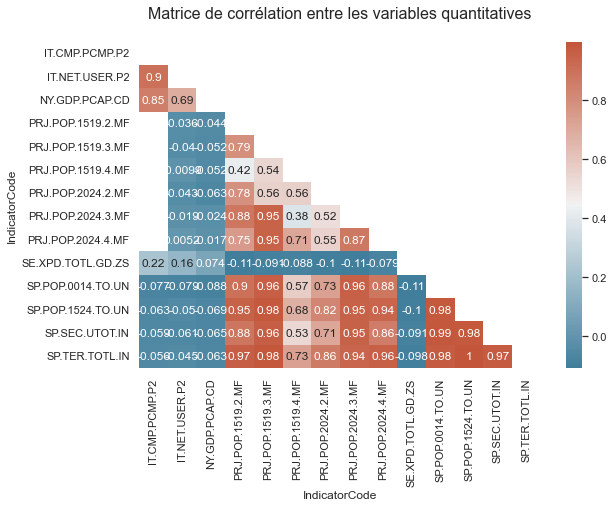

In [212]:
# Corrélation
corr = data_clean_corr.corr()

# Création d'un masque
mask = np.triu(corr)

# Taille du graph
plt.subplots(figsize=(9,6))

# Colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Heatmap avec masque
sns.heatmap(corr, annot = True, mask = mask, cmap=cmap)
plt.title("Matrice de corrélation entre les variables quantitatives\n", fontsize=16);
plt.savefig('img/correlation.png', bbox_inches='tight')

Les principales informations à retenir sont:

- forte corrélation positive (0.9) entre le pourcentage d'utilisateurs internet et le pourcentage de personnes ayant un ordinateur personnel. Quand l'un augmente, l'autre augmente aussi
- forte corrélation positive entre le PIB par habitant et l'usage du numérique
- forte corrélation positive entre les indicateurs de projections et les indicateurs démographiques
- forte corrélation positive entre la population entre 0 et 14 ans et la population 15-24 et la population en âge de faire des études secondaires et supérieures
- forte corrélation positive entre la population entre 15 et 24 ans et la population 15-24 et la population en âge de faire des études secondaires et supérieures
- forte corrélation positive (0.97) entre les élèves en âge de faire des études secondaires et ceux en âge de faire des études tertiaires. Quand l'un augmente, l'autre augmente aussi
- forte corrélation positive entre les élèves en âge de faire des études secondaires (0.96) et tertiaires (0.99) et la population totale
- forte corrélation positive entre les élèves en âge de faire des études secondaires (0.98) et tertiaires (1) et la population 15-24 ans.
- pas de corrélation entre les dépenses du gouvernement dans l'éducation et les autres variables

####  Focus sur les indicateurs de projections <a class="anchor" id="evo_prj"></a>

Nous avons identifié parmi les indicateurs de projections des renseignements sur le total de population estimée entre 15 et 24 ans en fonction du niveau le plus haut d'éducation atteint. Nous avons retenu les niveaux de lower secondary à post secondary. Nous allons faire la somme des ces indicateurs par année et pays et visualiser à l'aide d'une courbe la tendance d'évolution.

In [213]:
# TOP 5 pays retenus
TOP5 = score_pays['CountryName'].tolist()

In [214]:
# Années de projections
liste_annee_PRJ = [str(i) for i in range(2020,2105, 5)]

In [215]:
# Filtre sur les indicateurs qui commencent par PRJ et sur les années de projection
tab_projection_pays = data_clean_new_indicateur[(data_clean_new_indicateur['IndicatorCode'].str.startswith('PRJ')) & 
                                                (data_clean_new_indicateur['Year'].isin(liste_annee_PRJ)) & 
                                                (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

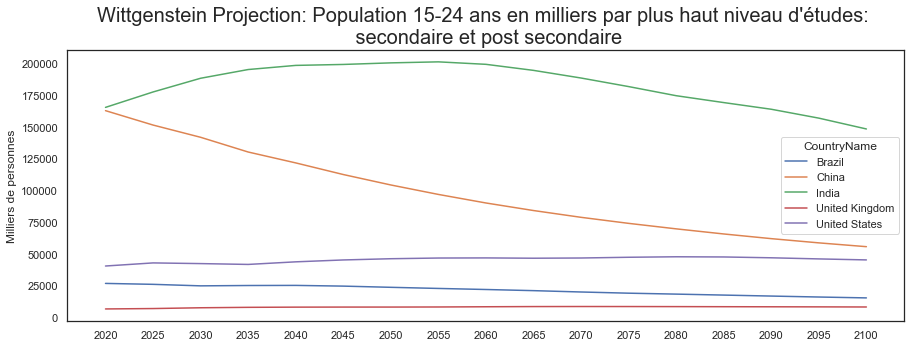

In [216]:
# lineplot par année
plt.figure(figsize=(15,5))
plt.title("Wittgenstein Projection: Population 15-24 ans en milliers par plus haut niveau d'études: \n secondaire et post secondaire", 
          size=20)
ax = sns.lineplot(data = tab_projection_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("Milliers de personnes", fontsize = 12)
ax.grid(False);
plt.savefig('img/projections.png', bbox_inches='tight')

Parmi les 5 pays retenus en fonction de leur score, on remarque que la population 15-24 ans avec un niveau d'éducation au minimum secondaire:
- augmente jusqu'en 2055 pour l'Inde puis a tendance à diminuer
- diminue progressivement pour la Chine tout en restant supérieure aux autres pays et inférieure à l'Inde
- reste à peu près stable pour les USA, le Brésil et le Royaume Uni

####  Population de 0 à 24 ans <a class="anchor" id="evo_024"></a>

In [217]:
tab_pop024_pays = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode.isin(['SP.POP.0014.TO.UN', 
                                                                                           'SP.POP.1524.TO.UN'])) &
                                            (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

tab_pop024_pays['Year'] = pd.to_numeric(tab_pop024_pays['Year'])

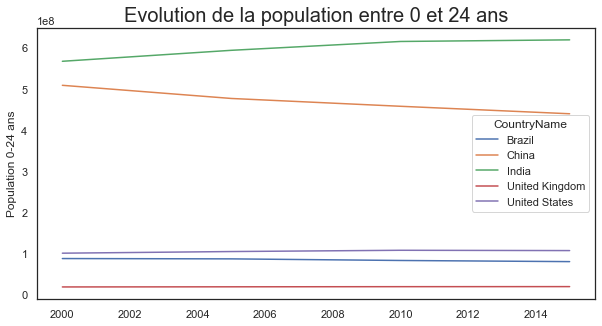

In [218]:
# lineplot par année
plt.figure(figsize=(10,5))
plt.title("Evolution de la population entre 0 et 24 ans", 
          size=20)
ax = sns.lineplot(data = tab_pop024_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("Population 0-24 ans", fontsize = 12)
ax.grid(False);

On peut imaginer que dans le futur la population entre 0 et 24 ans va continuer d'augmenter  pour l'Inde, diminuer pour la Chine tout en restant à un niveau important et rester à peu près stable pour les USA, le Brésil et le Royaume Uni.

On retrouve la même tendance que pour les indicateurs de projection.

####  Evolution numérique <a class="anchor" id="evo_num"></a>

In [219]:
tab_internet_pays = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode == 'IT.NET.USER.P2') &
                                              (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

tab_internet_pays['Year'] = pd.to_numeric(tab_internet_pays['Year'])

In [220]:
tab_ordinateur_pays = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode == 'IT.CMP.PCMP.P2') &
                                                (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

tab_ordinateur_pays['Year'] = pd.to_numeric(tab_ordinateur_pays['Year'])

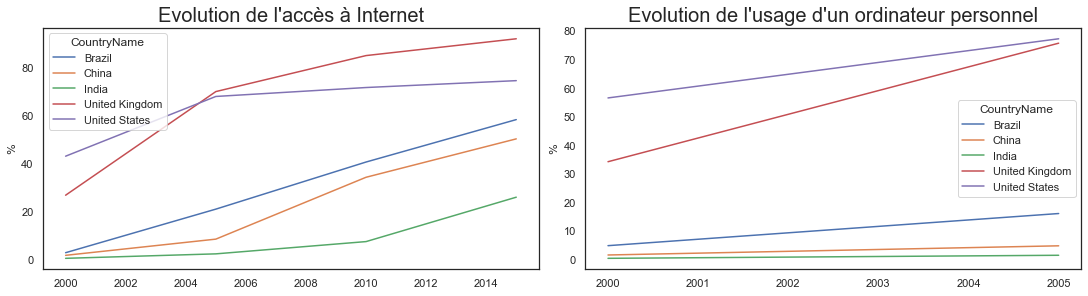

In [221]:
# Initialisation de la grille avec 1 ligne et 2 colonnes
fig = plt.figure(figsize=(15,4), constrained_layout=True)
gs = GridSpec(nrows=1, ncols=2, figure=fig)

# Premier graphique
ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
plt.title("Evolution de l'accès à Internet", size=20)
ax1 = sns.lineplot(data = tab_internet_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("%", fontsize = 12)
        

# Deuxième graphique
ax2 = fig.add_subplot(gs[0,1]) # emplacement dans la grille
plt.title("Evolution de l'usage d'un ordinateur personnel", size=20)
ax2 = sns.lineplot(data = tab_ordinateur_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("%", fontsize = 12);
plt.savefig('img/numerique.png', bbox_inches='tight')

L'accès à internet et à un ordinateur personnel augmente au fil des ans. On peut imaginer que cette tendance va se poursuivre mais de manière moins importante.

####  Evolution de la richesse et des dépenses du gouvernement dans l'éducation <a class="anchor" id="evo_GDP"></a>

In [222]:
tab_GDP_pays = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode == 'NY.GDP.PCAP.CD') &
                                              (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

tab_GDP_pays['Year'] = pd.to_numeric(tab_GDP_pays['Year'])

In [223]:
tab_expenditure_pays = data_clean_new_indicateur[(data_clean_new_indicateur.IndicatorCode == 'SE.XPD.TOTL.GD.ZS') &
                                                (data_clean_new_indicateur['CountryName'].isin(TOP5))].groupby(
    ['CountryName', 'Year']).sum().reset_index()

tab_expenditure_pays['Year'] = pd.to_numeric(tab_expenditure_pays['Year'])

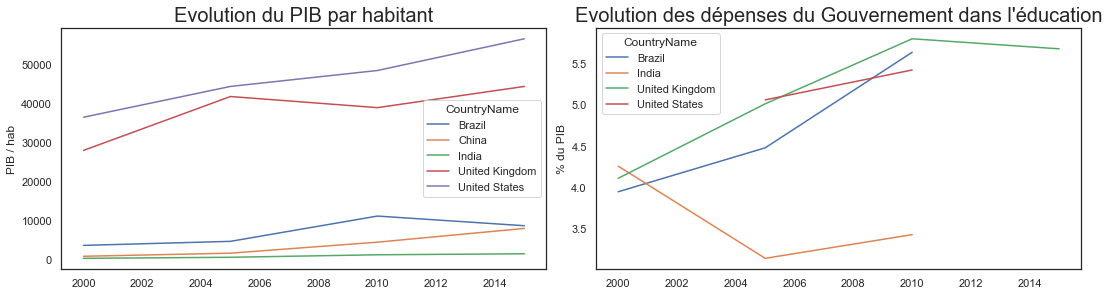

In [224]:
# Initialisation de la grille avec 1 ligne et 2 colonnes
fig = plt.figure(figsize=(15,4), constrained_layout=True)
gs = GridSpec(nrows=1, ncols=2, figure=fig)

# Premier graphique
ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
plt.title("Evolution du PIB par habitant", size=20)
ax1 = sns.lineplot(data = tab_GDP_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("PIB / hab", fontsize = 12)
ax1.grid(False)
        

# Deuxième graphique
ax2 = fig.add_subplot(gs[0,1]) # emplacement dans la grille
plt.title("Evolution des dépenses du Gouvernement dans l'éducation", size=20)
ax2 = sns.lineplot(data = tab_expenditure_pays, x = "Year", y = "Value", hue = "CountryName")
plt.xlabel("", fontsize = 12)
plt.ylabel("% du PIB", fontsize = 12)
ax2.grid(False);
plt.savefig('img/lineplots_pib_expenditures.png', bbox_inches='tight')

Le PIB par habitant a tendance à augmenter de manière générale. On peut noter en revanche qu'il diminue depuis 2010 pour le Brésil. Concernant les dépenses du Gouvernement dans l'éducation, on remarque que les informations ne sont pas disponibles pour de nombreuses années. On note cependant qu'elles sont importantes pour le Brésil, les USA et le Royaume Uni (même si elles diminuent depuis 2010). Les dépenses en Inde ont fortement baissé jusqu'en 2005 puis ont tendance à remonter. Pas d'information récente pour la Chine.

## Recommandations finales <a class="anchor" id="reco_fin"></a>

In [225]:
score_pays

,CountryName,SCORE_SYNT,SCORE_Prospects_Internet,SCORE_Prospects_Ordinateurs,SCORE_GDP_per_capita,SCORE_Gov_expenditures_%_GDP,SCORE_Pop_15-24_2040
0,United States,0.55,0.36,1.00,1.00,0.95,0.22
1,China,0.48,1.00,0.26,0.14,0.67,0.61
2,India,0.47,0.77,0.12,0.03,0.60,1.00
3,United Kingdom,0.28,0.09,0.20,0.78,0.99,0.04
4,Brazil,0.25,0.21,0.16,0.16,0.99,0.13


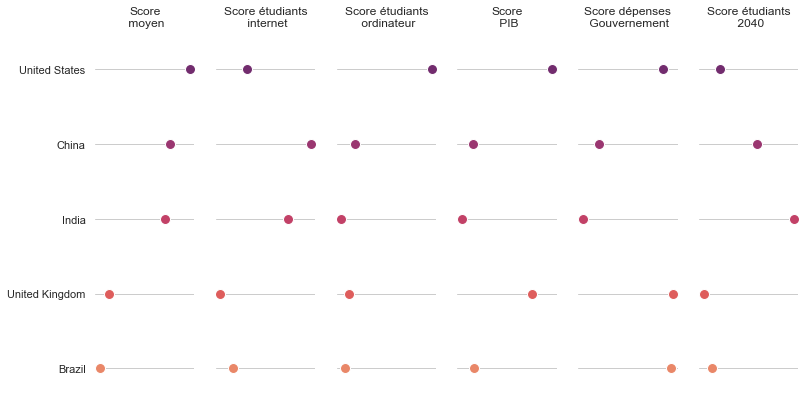

In [226]:
TOP_Pays = score_pays

# PairGrid
g = sns.PairGrid(TOP_Pays,
                 x_vars=TOP_Pays.columns[1:], y_vars=["CountryName"],
                 height=6, aspect=.3)

# Stripplot
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Labels
g.set(xlabel="", ylabel="")


# Titles
titles = ["Score\n moyen", "Score étudiants\n internet", "Score étudiants\n ordinateur", "Score\n PIB", 
          "Score dépenses\n Gouvernement", "Score étudiants\n 2040"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xticklabels([])

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
sns.despine(left=True, bottom=True)
plt.savefig('img/stripplot.png', bbox_inches='tight')

In [227]:
# Création de 2 séries requises pour la viz sous forme de map
country = list(score_pays['CountryName'])

# On arrondit à 2 chiffres après la virgule
score_pays['SCORE_SYNT'] = score_pays['SCORE_SYNT'].apply(lambda x : round(x, 2))

score = list(score_pays['SCORE_SYNT'])

In [228]:
list1 = [[country[i],score[i]] for i in range(len(country))] #prepare data for visualization
map_1 = Map(init_opts=opts.InitOpts(width="800px", height="460px")) #create the map and set the size of the map
map_1.add('Score moyen:', list1, maptype='world') #add world map
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) #remove country names
map_1.set_global_opts( #set global configurations
 visualmap_opts=opts.VisualMapOpts(max_=0.50, is_piecewise=False),
 legend_opts=opts.LegendOpts(is_show=False), #show legend or not
 title_opts=opts.TitleOpts(title="TOP 5 des pays retenus", 
                           subtitle="en fonction du score moyen")
)
map_1.render_notebook() #show the map in the notebook directly

Il serait intéressant de connaitre le niveau en anglais de chaque pays ciblé. En effet, Academy devrait faire de gros investissements en termes de traduction du contenu et de réalisation de nouvelles vidéos si la société souhaite s'implanter dans un pays où la population parle minoritairement anglais. Je n'ai trouvé aucun indicateur donnant cette information.